<a href="https://colab.research.google.com/github/adityagaurav28/Ranking-Countries-Based-on-Covid-Performance/blob/main/Ranking_Countries_Based_on_Covid_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from urllib.request import urlretrieve
import pandas as pd
import numpy as np


###The data is from Our World in Data covid dataset: https://ourworldindata.org/

In [ ]:
urlretrieve('https://covid.ourworldindata.org/data/owid-covid-data.csv', 'owid-covid-data.csv')
raw_data = pd.read_csv('owid-covid-data.csv')
raw_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104796,ZWE,Africa,Zimbabwe,2021-07-20,88415.0,2683.0,2163.429,2747.0,50.0,67.571,5948.694,180.516,145.559,184.822,3.364,4.546,1.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11254.0,844625.0,56.828,0.757,11166.0,0.751,0.194,5.2,tests performed,1897337.0,1247494.0,649843.0,69699.0,45971.0,12.77,8.39,4.37,3093.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
104797,ZWE,Africa,Zimbabwe,2021-07-21,91120.0,2705.0,2105.571,2809.0,62.0,68.143,6130.690,181.996,141.666,188.994,4.171,4.585,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12636.0,857261.0,57.678,0.850,11171.0,0.752,0.188,5.3,tests performed,1949472.0,1292642.0,656830.0,52135.0,47976.0,13.12,8.70,4.42,3228.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
104798,ZWE,Africa,Zimbabwe,2021-07-22,93421.0,2301.0,2078.429,2870.0,61.0,64.571,6285.505,154.815,139.840,193.098,4.104,4.344,1.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14987.0,872248.0,58.686,1.008,10365.0,0.697,0.201,5.0,tests performed,2017101.0,1352514.0,664587.0,67629.0,50034.0,13.57,9.10,4.47,

###Let's take a look at data

In [ ]:
raw_data.sample(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
29571,ERI,Africa,Eritrea,2020-07-01,203.0,0.0,8.429,NaN,NaN,0.000,57.241,0.000,2.377,NaN,NaN,0.000,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.52,3546427.0,44.304,19.3,3.607,2.171,1510.459,NaN,311.110,6.05,0.2,11.4,NaN,0.70,66.32,0.459,NaN
33891,FIN,Europe,Finland,2021-06-26,94989.0,270.0,102.857,969.0,0.0,0.286,17143.807,48.730,18.564,174.887,0.000,0.052,1.28,6.0,1.083,35.0,6.317,NaN,NaN,NaN,NaN,4888.0,5422203.0,978.610,0.882,10106.0,1.824,0.010,98.3,tests performed,4200712.0,3219935.0,980777.0,19.0,40542.0,75.82,58.11,17.70,7317.0,47.69,5540718.0,18.136,42.8,21.228,13.264,40585.721,NaN,153.507,5.76,18.3,22.6,NaN,3.28,81.91,0.938,NaN
57462,MWI,Africa,Malawi,2021-02-07,27195.0,320.0,461.714,856.0,19.0,22.000,1421.592,16.728,24.136,44.747,0.993,1.150,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1873.0,0.098,0.247,4.1,samples tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.85,19129955.0,197.519,18.1,2.979,1.783,1095.042,71.4,227.349,3.94,4.4,24.7,8.704,1.30,64.26,0.483,NaN
24778,CZE,Europe,Czechia,2021-03-19,1449696.0,10677.0,10385.429,24331.0,214.0,209.429,135371.971,997.014,969.787,2272.018,19.983,19.556,0.91,1995.0,186.292,8774.0,819.312,NaN,NaN,NaN,NaN,188753.0,NaN,NaN,17.626,182327.0,17.026,0.100,10.0,tests performed,1341145.0,981161.0,359988.0,47849.0,37666.0,12.52,9.16,3.36,3517.0,81.48,10708982.0,137.176,43.3,19.027,11.580,32605.906,NaN,227.485,6.82,30.5,38.3,NaN,6.63,79.38,0.900,NaN
77235,QAT,Asia,Qatar,2021-06-23,221273.0,154.0,153.571,586.0,2.0,1.000,76802.635,53.453,53.304,203.397,0.694,0.347,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4751.0,2131383.0,739.791,1.649,5289.0,1.836,0.029,34.4,people tested,2926066.0,1635054.0,1291012.0,17103.0,11497.0,101.56,56.75,44.81,3991.0,59.26,2881060.0,227.322,31.9,1.307,0.617,116935.600,NaN,176.690,16.52,0.8,26.9,NaN,1.20,80.23,0.848,NaN
1470,ALB,Europe,Albania,2021-04-25,130537.0,128.0,134.714,2378.0,6.0,5.143,45359.997,44.478,46.812,826.326,2.085,1.787,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2789.0,604774.0,210.152,0.969,2757.0,0.958,0.049,20.5,tests performed,NaN,NaN,NaN,NaN,10205.0,NaN,NaN,NaN,3546.0,54.63,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
10171,BLZ,North America,Belize,2020-04-26,18.0,0.0,0.000,2.0,0.0,0.000,45.269,0.000,0.000,5.030,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.00,397621.0,16.426,25.0,3.853,2.279,7824.362,NaN,176.957,17.11,NaN,NaN,90.083,1.30,74.62,0.716,NaN
23773,CUB,North America,Cuba,2021-07-24,324115.0,7732.0,6929.571,2271.0,68.0,61.143,28615.343,682.640,611.795,200.501,6.004,5.398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11

###Each row has the covid status of a particular country on that particular day.

Since we are interested on the final performance of each country so we take the covid status of 5 days before because there are many fields of data for the latest day which are not yet updated. 

### **Why data before 5 days? Why not take data from 30 or 50 days ago.**

On exploring the data I found that the number of null values of the fields are almost same at 5 days or 30 days or 50 days. Moreover going way back will be a issue for vaccine data.

In [ ]:
raw_data['date'] = pd.to_datetime(raw_data['date'])
dates = raw_data['date'].unique()
date = sorted(dates)[-5]

covid_cases_raw_data = raw_data[raw_data['date'] == date]
covid_cases_raw_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
512,AFG,Asia,Afghanistan,2021-07-20,142414.0,925.0,1108.714,6266.0,53.0,67.857,3658.363,23.762,28.481,160.962,1.361,1.743,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.24,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,NaN
1040,OWID_AFR,NaN,Africa,2021-07-20,6296294.0,33527.0,39011.571,159671.0,1044.0,882.857,4696.631,25.009,29.100,119.104,0.779,0.659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.902231e+07,3.960571e+07,2.026936e+07,351054.0,545075.0,4.40,2.95,1.51,407.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1556,ALB,Europe,Albania,2021-07-20,132740.0,43.0,18.857,2456.0,0.0,0.000,46125.513,14.942,6.553,853.430,0.000,0.000,1.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.082424e+06,6.095380e+05,4.728860e+05,NaN,6680.0,37.61,21.18,16.43,2321.0,37.96,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,NaN
2072,DZA,Africa,Algeria,2021-07-20,155784.0,1298.0,1128.714,3979.0,23.0,16.000,3552.572,29.600,25.740,90.739,0.525,0.365,1.32,45.0,1.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,NaN
2582,AND,Europe,Andorra,2021-07-20,14379.0,20.0,30.286,127.0,0.0,0.000,186099.786,258.849,391.972,1643.694,0.000,0.000,1.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102793,WLF,Oceania,Wallis and Futuna,2021-07-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.158000e+03,4.629000e+03,4.529000e+03,NaN,7.0,81.43,41.16,40.27,622.0,NaN,1.124600e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,NaN,NaN
103339,OWID_WRL,NaN,World,2021-07-20,191445502.0,529441.0,518452.571,4118337.0,12022.0,8425.000,24560.673,67.922,66.513,528.344,1.542,1.081,1.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.725093e+09,2.077412e+09,1.033479e+09,32174795.0,30933827.0,47.79,26.65,13.26,3969.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,NaN
103810,YEM,Asia,Yemen,2021-07-20,6992.0,5.0,4.429,1371.0,1.0,0.714,234.427,0.168,0.148,45.967,0.034,0.024,1.0

In [ ]:
#All the columns in the dataset

covid_cases_raw_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

####The description for each column can be found over here: https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv

####We are taking the given columns as part our ranking further: 'iso_code', 'continent', 'location', 'date', 'total_cases', 'total_deaths', 'total_tests', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index'.

In [ ]:
covid_cases_data = covid_cases_raw_data[['iso_code', 'continent', 'location', 'date', 'total_cases', 'total_deaths', 'total_tests', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'population', 'population_density', 'median_age', 'gdp_per_capita', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index']]
covid_cases_data = covid_cases_data.reset_index(drop = True) # The dataframe was taking index of past dataframe only. So reset_index() gives a new one.
covid_cases_data

,iso_code,continent,location,date,total_cases,total_deaths,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,population,population_density,median_age,gdp_per_capita,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2021-07-20,142414.0,6266.0,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,1803.987,0.500,64.83,0.511
1,OWID_AFR,NaN,Africa,2021-07-20,6296294.0,159671.0,NaN,5.902231e+07,3.960571e+07,2.026936e+07,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN
2,ALB,Europe,Albania,2021-07-20,132740.0,2456.0,NaN,1.082424e+06,6.095380e+05,4.728860e+05,2.877800e+06,104.871,38.0,11803.431,2.890,78.57,0.795
3,DZA,Africa,Algeria,2021-07-20,155784.0,3979.0,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,13913.839,1.900,76.88,0.748
4,AND,Europe,Andorra,2021-07-20,14379.0,127.0,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,83.73,0.868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,WLF,Oceania,Wallis and Futuna,2021-07-20,NaN,NaN,NaN,9.158000e+03,4.629000e+03,4.529000e+03,1.124600e+04,NaN,NaN,NaN,NaN,79.94,NaN
218,OWID_WRL,NaN,World,2021-07-20,191445502.0,4118337.0,NaN,3.725093e+09,2.077412e+09,1.033479e+09,7.794799e+09,58.045,30.9,15469.207,2.705,72.58,0.737
219,YEM,Asia,Yemen,2021-07-20,6992.0,1371.0,NaN,NaN,NaN,NaN,2.982597e+07,53.508,20.3,1479.147,0.700,66.12,0.470
220,ZMB,Africa,Zambia,2021-07-20,187602.0,3138.0,2024817.0,3.012200e+05,2.323830e+05,6.883700e+04,1.838396e+07,22.995,17.7,3689.251,2.000,63.89,0.584


###We start with 60 columns now we are at 18 columns.

###Now let's refine row data. Starting with the **ISO_CODE**

In [ ]:
iso_code_list = covid_cases_raw_data['iso_code'].unique()
iso_code_list

array(['AFG', 'OWID_AFR', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM', 'ABW', 'OWID_ASI', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD',
       'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH',
       'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR',
       'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM',
       'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE',
       'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ',
       'ERI', 'EST', 'SWZ', 'ETH', 'OWID_EUR', 'OWID_EUN', 'FRO', 'FJI',
       'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB',
       'GRC', 'GRL', 'GRD', 'GTM', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI',
       'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'OWID_INT', 'IRN', 'IRQ',
       'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN',
       'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR',
       'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV

###In this list there are few code starting with 'OWID_'. These are the collective data of a collection of countries i.e 7 Continents, Europian Union and World.  Now we will separate the dataset to individual countries and collection of countries.

In [ ]:
continent_iso_code = ['OWID_AFR','OWID_ASI','OWID_EUR','OWID_NAM','OWID_OCE','OWID_SAM']

# OWID_INT has some strange values. It's location was international and we already had world. So discarding that.
# OWID_CYN was in iso_code list but not in the dataset. Couldn't figure out the reason for that.
# OWID_KOS is a country.

continent_covid_cases_data = covid_cases_data[covid_cases_data['iso_code'].isin(continent_iso_code)].reset_index(drop=True)

world_covid_cases_data = covid_cases_data[covid_cases_data['iso_code'] == 'OWID_WRL'].reset_index(drop=True)

eun_covid_cases_data = covid_cases_data[covid_cases_data['iso_code'] == 'OWID_EUN'].reset_index(drop=True)

country_covid_cases_data = covid_cases_data[~covid_cases_data['iso_code'].isin(continent_iso_code + ['OWID_EUN','OWID_INT','OWID_WRL'])].reset_index(drop=True)

In [ ]:
country_covid_cases_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   iso_code                    213 non-null    object        
 1   continent                   213 non-null    object        
 2   location                    213 non-null    object        
 3   date                        213 non-null    datetime64[ns]
 4   total_cases                 192 non-null    float64       
 5   total_deaths                185 non-null    float64       
 6   total_tests                 76 non-null     float64       
 7   total_vaccinations          103 non-null    float64       
 8   people_vaccinated           102 non-null    float64       
 9   people_fully_vaccinated     99 non-null     float64       
 10  population                  213 non-null    float64       
 11  population_density          204 non-null    float64       

###Dropping rows for the countries with having no data for 'total_cases', 'total_deaths' or 'total_vaccinations'.

In [ ]:
no_total_cases = pd.isnull(country_covid_cases_data['total_cases'])
no_total_deaths = pd.isnull(country_covid_cases_data['total_deaths'])
no_total_vaccinations = pd.isnull(country_covid_cases_data['total_vaccinations'])
drop_rows = no_total_cases | no_total_deaths | no_total_vaccinations 
country_covid_cases_data = country_covid_cases_data[~drop_rows].reset_index(drop=True)
country_covid_cases_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   iso_code                    88 non-null     object        
 1   continent                   88 non-null     object        
 2   location                    88 non-null     object        
 3   date                        88 non-null     datetime64[ns]
 4   total_cases                 88 non-null     float64       
 5   total_deaths                88 non-null     float64       
 6   total_tests                 48 non-null     float64       
 7   total_vaccinations          88 non-null     float64       
 8   people_vaccinated           86 non-null     float64       
 9   people_fully_vaccinated     83 non-null     float64       
 10  population                  88 non-null     float64       
 11  population_density          87 non-null     float64       
 

###Let's take into account only those countries with population greater than equal to 10 Lakh (1 Million) **OR** 1 Lakh (0.1 Million) covid cases  **OR** atleast 1 Lakh (0.1 Million) vaccine administered.

In [ ]:
country_covid_cases_data = country_covid_cases_data[(country_covid_cases_data['population'] >= 1000000) | (country_covid_cases_data['total_vaccinations'] >= 100000) | (country_covid_cases_data['total_cases'] >= 100000)]
country_covid_cases_data = country_covid_cases_data.dropna(subset=['population','total_vaccinations','total_cases'])

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

###Let's start with something basic like pie chart for all the top 10 in various categories.

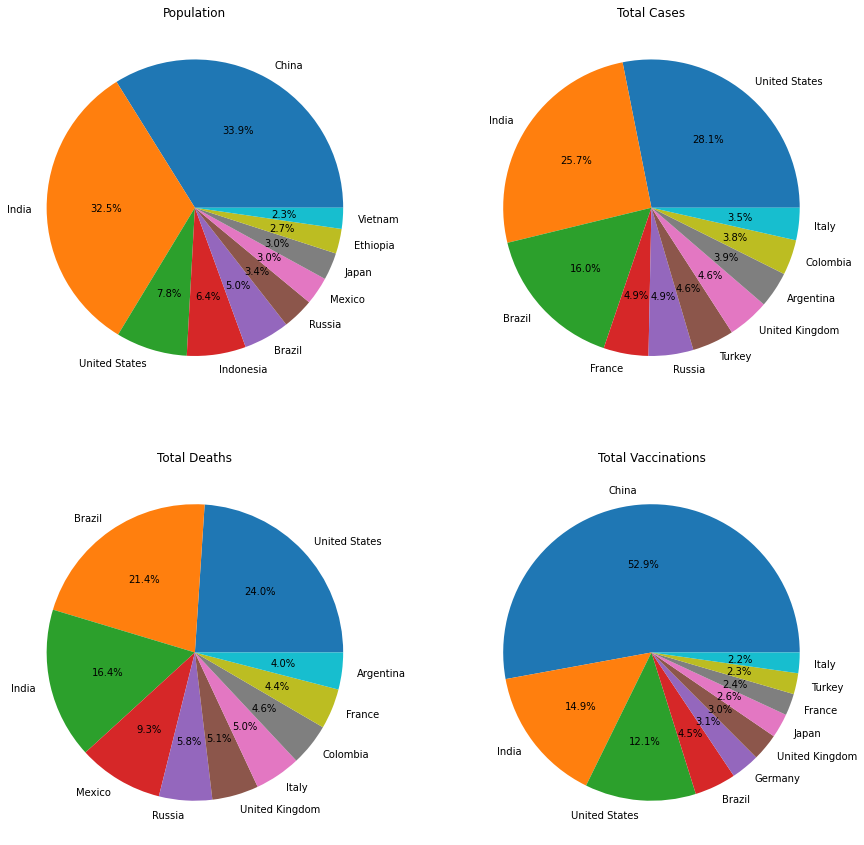

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

#Population
data0 = country_covid_cases_data.sort_values('population',ascending=False).head(10)

axes[0,0].set_title('Population')
axes[0,0].pie(data0['population'],labels=data0['location'],autopct='%1.1f%%');

#Total Cases
data1 = country_covid_cases_data.sort_values('total_cases',ascending=False).head(10)

axes[0,1].set_title('Total Cases')
axes[0,1].pie(data1['total_cases'],labels=data1['location'],autopct='%1.1f%%');

#Total Deaths
data2 = country_covid_cases_data.sort_values('total_deaths',ascending=False).head(10)

axes[1,0].set_title('Total Deaths')
axes[1,0].pie(data2['total_deaths'],labels=data2['location'],autopct='%1.1f%%');

#Total Vaccinations
data3 = country_covid_cases_data.sort_values('total_vaccinations',ascending=False).head(10)

axes[1,1].set_title('Total Vaccinations')
axes[1,1].pie(data3['total_vaccinations'],labels=data3['location'],autopct='%1.1f%%');

**Note: The percetage given in the chart is percentage share amoong the top 10 countries in various categories. It does not represent percentage for the whole world. We will look at that graph at the later stage.**

##Inferences from the above pie charts:

> China which has the highest population is not even in the chart for the number of cases and deaths but in the number of doses administered it is leading the pact by a huge margin.

> United States which has only 7.6% of the population but is one of the worst affected due to covid as it accounted for over 20% deaths and cases.

> India is somewhat consistent in the all these things. It has 25.9% of cases but accounted for only 15% of deaths and its second in vaccination only behind China.

> Brazil performance is average. Although it had only 15.9% of cases but accounted for 20.5% of deaths. In a similar way other countries like United Kingdom, Italy, Peru, Mexico, Russia and Colombia has also shown the similar behaviour as Brazil.

###This chart is based on absolute numbers. So it might not be such a good measure. For example: China has given over 100 Crore (1 Billion) doses but it has a population of 140 Crore (1.4 Billion) whereas US has given around 33 Crore (0.33 Billion) doses but it's population is  also around 33 Crore (0.33 Billion). 

##So let's take the metrics as a percentage of population.

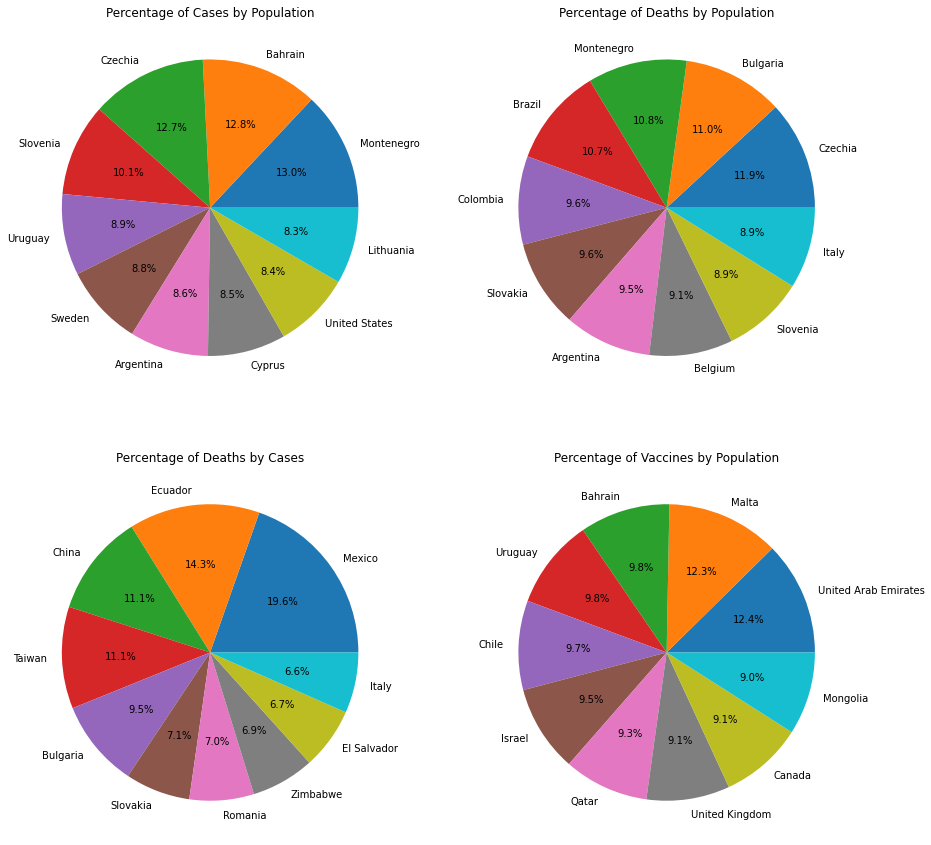

In [ ]:
#New Columns
country_covid_cases_data['percentage_of_cases_by_population'] = (country_covid_cases_data['total_cases']/country_covid_cases_data['population'])*100
country_covid_cases_data['percentage_of_deaths_by_population'] = (country_covid_cases_data['total_deaths']/country_covid_cases_data['population'])*100
country_covid_cases_data['percentage_of_deaths_by_cases'] = (country_covid_cases_data['total_deaths']/country_covid_cases_data['total_cases'])*100
country_covid_cases_data['percentage_of_vaccines_by_population'] = (country_covid_cases_data['total_vaccinations']/country_covid_cases_data['population'])*100
country_covid_cases_data['percentage_of_tests_by_population'] = (country_covid_cases_data['total_tests']/country_covid_cases_data['population'])*100
country_covid_cases_data['percentage_of_cases_by_tests'] = (country_covid_cases_data['total_cases']/country_covid_cases_data['total_tests'])*100

#ReArranging
country_covid_cases_data = country_covid_cases_data[['iso_code', 'continent', 'location', 'date', 'total_cases', 'total_deaths', 'total_tests', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'population', 'population_density','percentage_of_cases_by_population','percentage_of_deaths_by_population', 'percentage_of_deaths_by_cases','percentage_of_vaccines_by_population','percentage_of_tests_by_population', 'percentage_of_cases_by_tests', 'median_age', 'gdp_per_capita', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index']]

#Pie Chart
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

#Percentage of Cases by Population
data0 = country_covid_cases_data.sort_values('percentage_of_cases_by_population',ascending=False).head(10)

axes[0,0].set_title('Percentage of Cases by Population')
axes[0,0].pie(data0['percentage_of_cases_by_population'],labels=data0['location'],autopct='%1.1f%%');

#Percentage of Deaths by Population
data1 = country_covid_cases_data.sort_values('percentage_of_deaths_by_population',ascending=False).head(10)

axes[0,1].set_title('Percentage of Deaths by Population')
axes[0,1].pie(data1['percentage_of_deaths_by_population'],labels=data1['location'],autopct='%1.1f%%');

#Percentage of Deaths by Cases
data2 = country_covid_cases_data.sort_values('percentage_of_deaths_by_cases',ascending=False).head(10)

axes[1,0].set_title('Percentage of Deaths by Cases')
axes[1,0].pie(data2['percentage_of_deaths_by_cases'],labels=data2['location'],autopct='%1.1f%%');

#Percentage of Vaccines by Population
data3 = country_covid_cases_data.sort_values('percentage_of_vaccines_by_population',ascending=False).head(10)

axes[1,1].set_title('Percentage of Vaccines by Population')
axes[1,1].pie(data3['percentage_of_vaccines_by_population'],labels=data3['location'],autopct='%1.1f%%');

**Note: The percetage given in the chart is percentage share amoong the top 10 countries in various categories. It does not represent percentage for the whole world. We will look at that graph at the later stage.**

##This is a suprise chart. From the previous chart very few countries are common.

> US which has highest number of cases in terms of absolute numbers is tenth in when it comes percentage of cases by population

> Peru is the worst affected in terms of percentage of deaths by population or by cases. The number of infected people might be less in the country but many of those has died. The thing to find out what might be the reason for the same. This is anwered in the later part. This is same for all the countries in the second and third pie charts except Brazil and Mexico. As they have higher number of deaths even in absolute numbers.

> China which has administered over 100 Crore (1 Billion) of doses but when it comes to what share of the population is given the shot it is not even in the top 10. (Every person needs to have two shots of the vaccine.) We will look at the reason why UAE is ahead in this field in the later part.

###In order to gain more insight lets divide the dataset into two categories based on population. The country with population greater than 1 Crore (10 Million) are kept in Category 1 and the rest in category 2.


In [ ]:
country_covid_cases_data['category'] = np.where(country_covid_cases_data['population'] >= 10000000,'Population >= 1 Crore (10 Million)','Population < 1 Crore (10 Million)')
len(country_covid_cases_data)

82

###Let's see the relation between total cases and other parameters. Like how the number of cases vary with the Population.

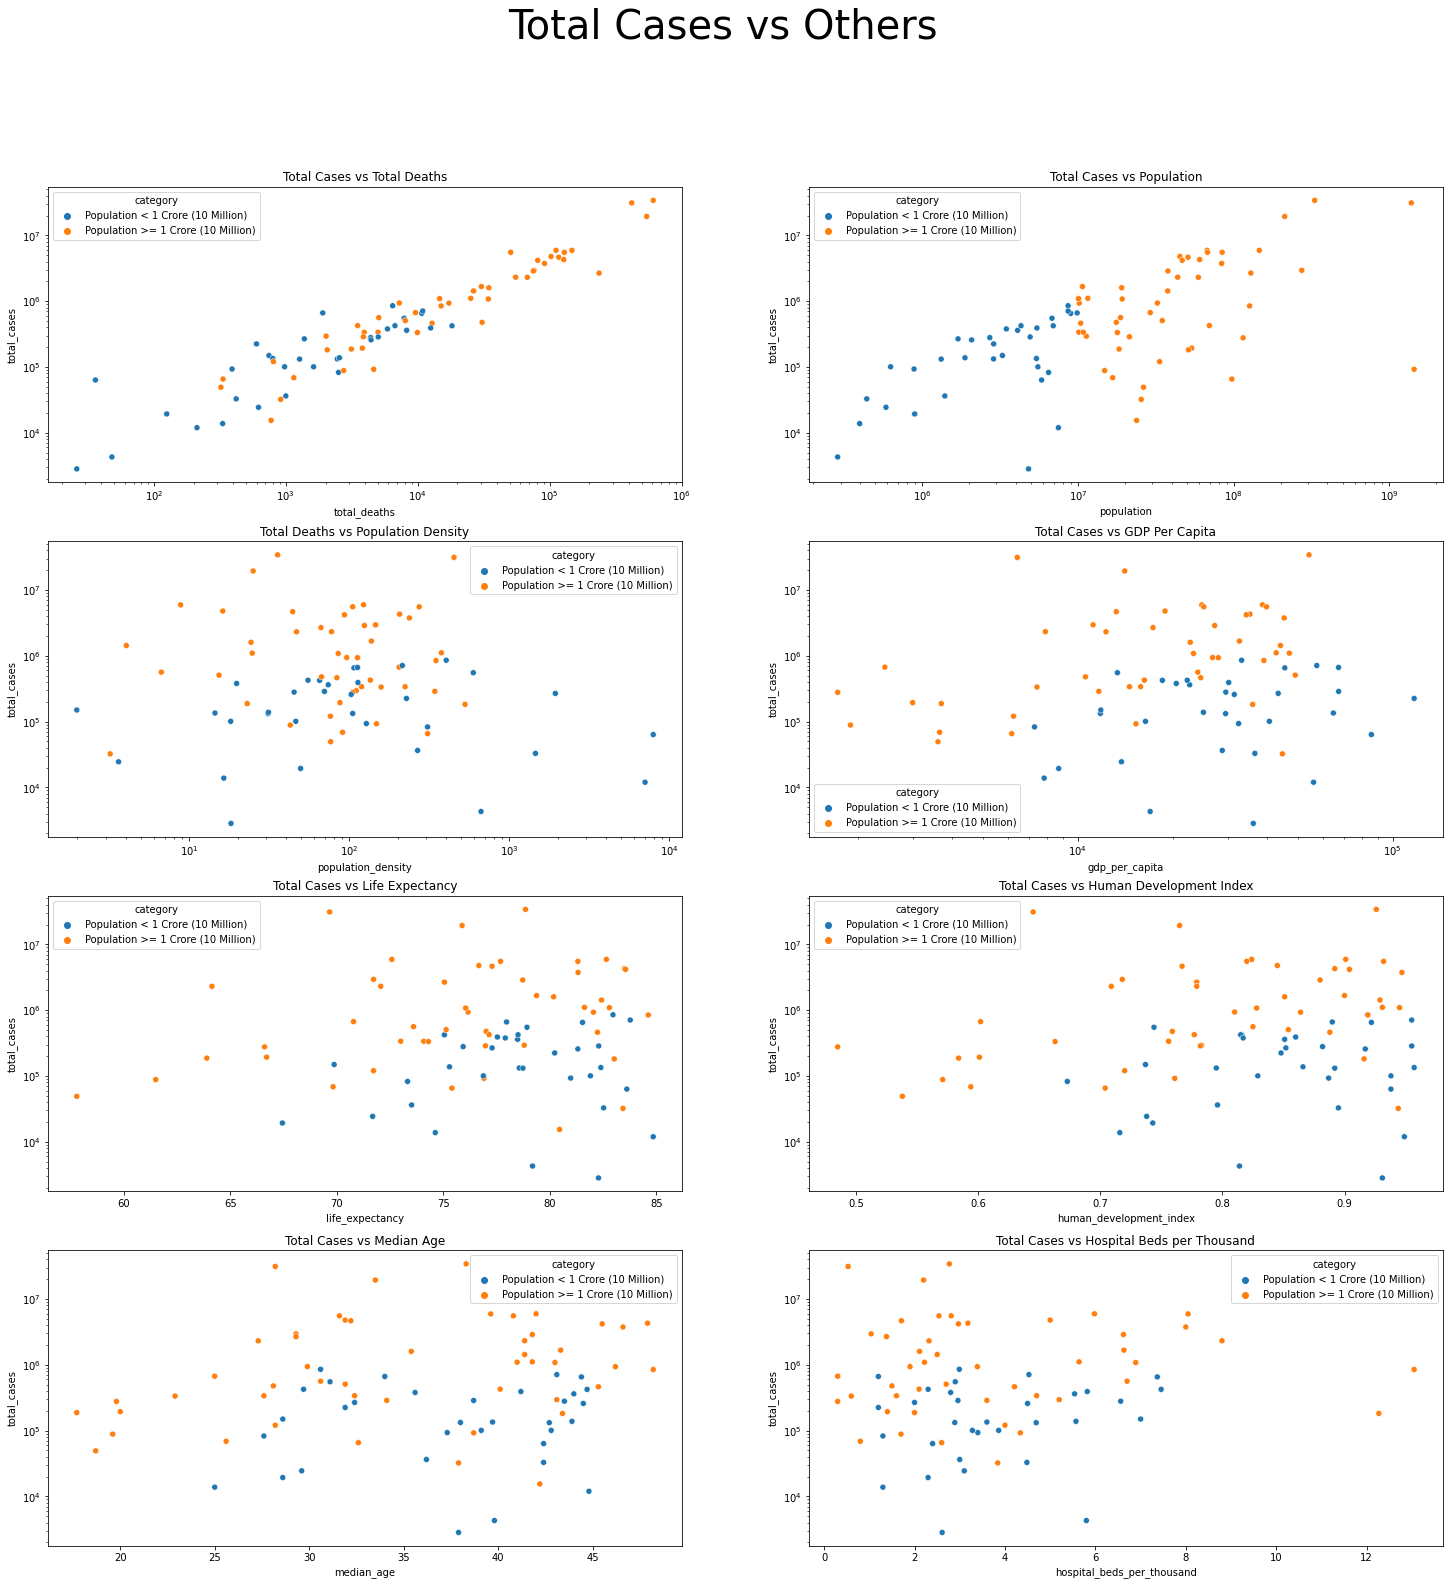

In [ ]:
#Total Cases vs Others
fig, axes = plt.subplots(4, 2, figsize=(25, 25))
fig.suptitle('Total Cases vs Others',fontsize=40)

#Total Cases vs Total Deaths
axes[0,0].set_title('Total Cases vs Total Deaths')
axes[0,0].set_xscale("log")
axes[0,0].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['total_deaths'], y = country_covid_cases_data['total_cases'],hue=country_covid_cases_data['category'],ax=axes[0,0]);

#Total Cases vs Population
axes[0,1].set_title('Total Cases vs Population')
axes[0,1].set_xscale("log")
axes[0,1].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['population'], y = country_covid_cases_data['total_cases'],hue=country_covid_cases_data['category'],ax=axes[0,1]);

sns.scatterplot()

#Total Cases vs Population Density
axes[1,0].set_title('Total Deaths vs Population Density')
axes[1,0].set_xscale("log")
axes[1,0].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['population_density'], y = country_covid_cases_data['total_cases'],hue=country_covid_cases_data['category'],ax=axes[1,0]);

#Total Cases vs GDP Per Capita
axes[1,1].set_title('Total Cases vs GDP Per Capita')
axes[1,1].set_xscale("log")
axes[1,1].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['gdp_per_capita'], y = country_covid_cases_data['total_cases'],hue=country_covid_cases_data['category'],ax=axes[1,1]);

#Total Cases vs Life Expectancy
axes[2,0].set_title('Total Cases vs Life Expectancy')
axes[2,0].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['life_expectancy'], y = country_covid_cases_data['total_cases'],hue=country_covid_cases_data['category'],ax=axes[2,0]);

#Total Cases vs Human Development Index
axes[2,1].set_title('Total Cases vs Human Development Index')
axes[2,1].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['human_development_index'], y = country_covid_cases_data['total_cases'],hue=country_covid_cases_data['category'],ax=axes[2,1]);

#Total Cases vs Median Age
axes[3,0].set_title('Total Cases vs Median Age')
axes[3,0].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['median_age'], y = country_covid_cases_data['total_cases'],hue=country_covid_cases_data['category'],ax=axes[3,0]);

#Total Cases vs Hospital Beds per Thousand
axes[3,1].set_title('Total Cases vs Hospital Beds per Thousand')
axes[3,1].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['hospital_beds_per_thousand'], y = country_covid_cases_data['total_cases'],hue=country_covid_cases_data['category'],ax=axes[3,1]);

##The chart's output is not as expected atleast for my expectations.

> From the First Graph it is evident that as the number of cases increased the number of deaths also increased.

> From the Second Graph it's not sure but a general conclusion can be drawn that the country with a higher population is more likely to have increased number of cases.

> From the rest of the graphs no inferences can be drawn which came as a suprise for me. Because I expected the cases should increase with population density as more people will be living in the same area and chances of transmission might be higher. 

> It was expected that countries with higher GDP Per Capita, life expectancy, Human Development Index and Hospital Beds per Thousand generally implies that the country has better resources to handle the pandemic and the number of cases should be lower. But from the graph it is evident that these all factors do not matter. 

> Also higher Median Age means more affected population as covid was predicted to affect older population more. But that was not the case.

###It can be infered that the countries which had better health facilities has not performed well till now.



###Let's examine the relation between other parameters. It would be too long to study the relationship between various parameters using graph. So we can use the correlation between each parameters to get an idea about the relationship between them.

####Still for reference there are other graphs of Total Deaths vs Others, etc. Their output is not much different from the last set of graphs

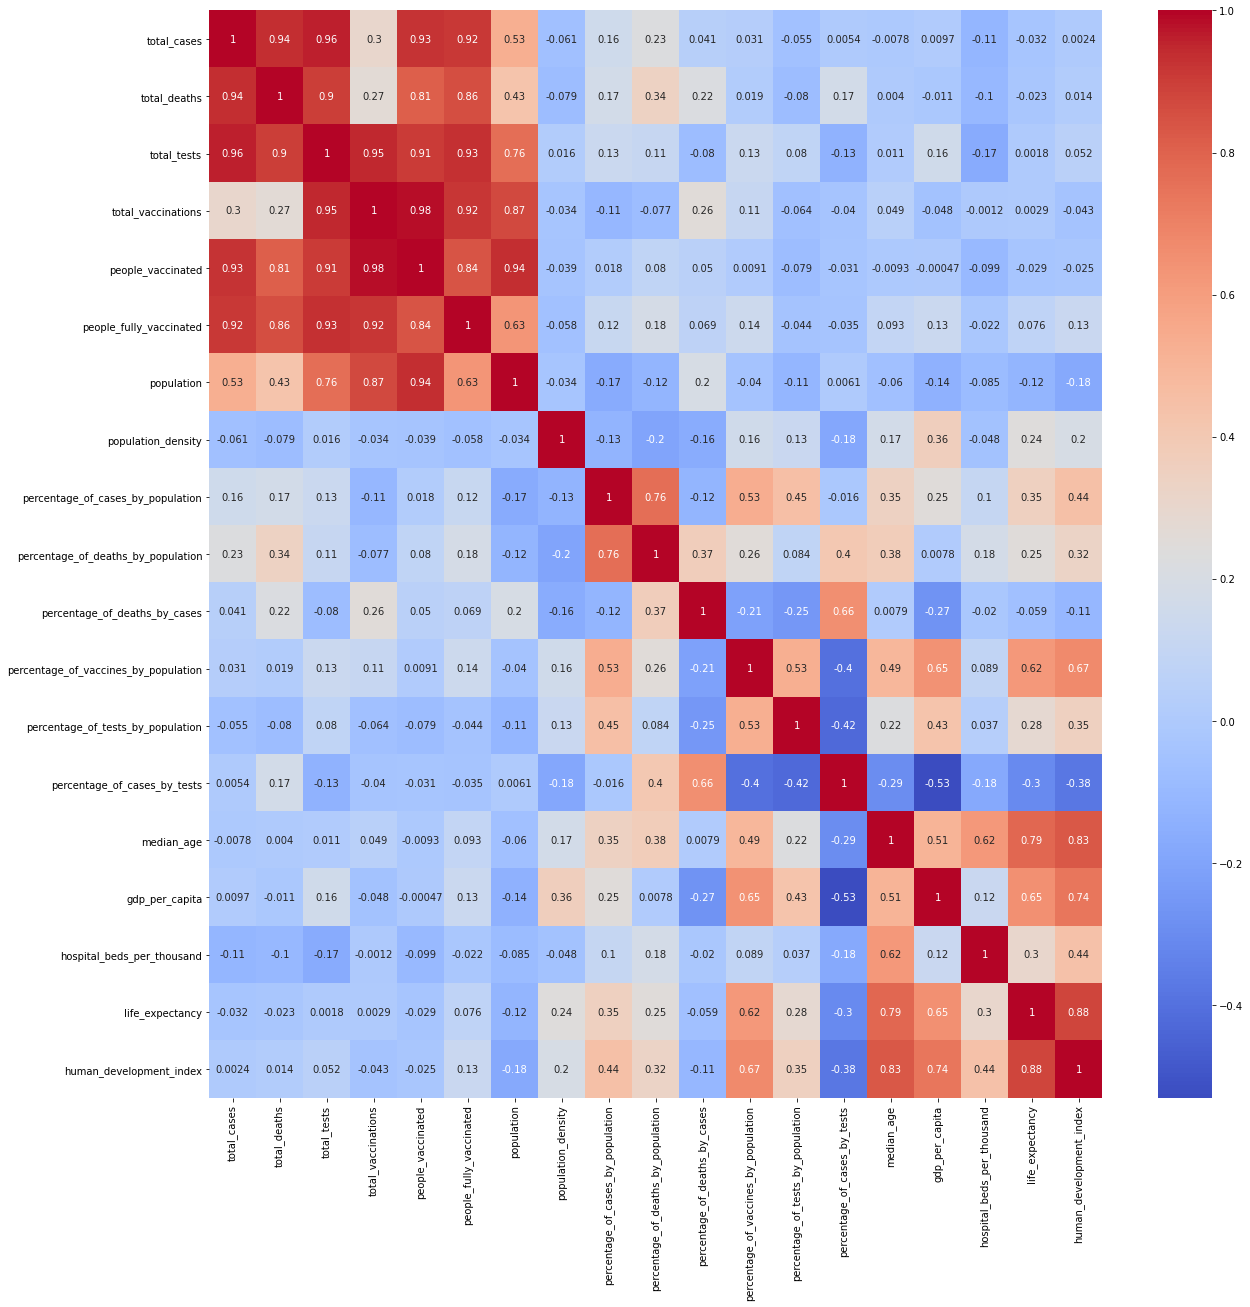

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(20, 20))
corr = country_covid_cases_data.iloc[:,4:].corr()
axes = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2g');

##The above heatmap gives a great insight on the relationship between various parameters.

> The top left corner of the heatmap just confirmed our previous inferences that cases, deaths and population are directly proportional to each other. It also shows that along with these three parameters, tests conducted and vaccination progress is also proportional to cases, deaths and population. The absolute numbers of cases, deaths or vaccinations does not vary much with other parameters.

> So it can be infered that the country which has higher population conducted more number tests also has more number of cases and deaths. But they also rolled out vaccines more aggresively.

> Also covid didn't care if the country has a better health facilities, higher HDI or lower poverty. It affected each and every country. Some where less affected some where more.

> So it can  be concluded that the it was a poor performance by the countries which has better health facilities if it was affected more and a better performance for the countries which has not good health facilities if it was affected less.

###In order to start ranking various countries, we need to start with replacing all the NaN or Null values with 0.

In [ ]:
#country_covid_cases_data.fillna(0,inplace=True)
#country_covid_cases_data.reset_index(drop=True,inplace=True)
country_covid_cases_data.dropna(subset=['total_cases','total_deaths','total_vaccinations','population','median_age','gdp_per_capita','hospital_beds_per_thousand','life_expectancy','human_development_index'],inplace=True)
country_covid_cases_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 87
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   iso_code                              78 non-null     object        
 1   continent                             78 non-null     object        
 2   location                              78 non-null     object        
 3   date                                  78 non-null     datetime64[ns]
 4   total_cases                           78 non-null     float64       
 5   total_deaths                          78 non-null     float64       
 6   total_tests                           44 non-null     float64       
 7   total_vaccinations                    78 non-null     float64       
 8   people_vaccinated                     76 non-null     float64       
 9   people_fully_vaccinated               75 non-null     float64       
 10  popu

## To rank countries we will use the following procedure with three main parameters Total Cases, Deaths and Doses of Vaccines Administered:

###Higher Score means better Performance

###We will measure the percentage of cases by population and percentage of cases by total world cases.

###Then we will multiply both the percentages with each other to get a new number and scaled it to a range of 0-100 and subtract it from 100. This number will be used for final calculation.

> **Reason**: Higher Metric means better performance.

> **Description**: Assume a country A with 10 Crore Population, 10 Lakh Covid Cases and 1% of Population affected and country B with 1 Crore Population, 10 Lakh Covid Cases and 10% of Population affected. From the total cases, each country is responsible for 50% of the cases. But since country B has same number of people affected for a smaller population than country A. So it performed bad. The same result can be derived on following the above procedure.

####Let's call the number obtained at the end 'metric'.

###For Death Metric, we will be multiplying percentage of deaths by total cases with percentage of deaths by world deaths.

###For Vaccine Metric, we will be multiplying percentage of vaccines given by total population with percentage of vaccines given by world vaccines given not be subtracting from 100.

---

###Hospital Beds per Thousand, Life Expectancy and Human Development Index shows the level of health infrastructure the country has.

###Median Age, GDP per Capita, Hospital Beds per Thousand, Life Expectancy and Human Development Index will also be scaled to a range of 0-100.

####Parameter_1 = Median Age * Metric

> **Reason**: Median Age is inversely proportional to Metric

> **Descriptiom**: The chances of getting covid and dying from that is higher in older age group. So a country with older population has high chances of getting severly affected. If two countries has same metric and country A has higher median age than country B. Then country A performed better than country B.

####Parameter_2 = (100 - GDP per Capita) * Metric

> **Reason**: GDP per Capita is directly proportional to Metric

> **Description**: A country with higher GDP per Capita means the people are well off and it has better resource to fight with the pandemic. So  a country with higher GDP per Capita has lower chances of getting severly affected. It two countries has the same metric and country A has higher GDP per Capita than country B. Then country B performed better than country A.

####Parameter_3 = (100 - Hospitals Bed per Thousand) * Metric

> **Reason**: Hospitals Bed per Thousand is directly proportional to Metric

> **Description**: Same as description of Parameter_2

####Parameter_4 = (100 - Life Expectancy) * Metric

> **Reason**: Life Expectancy is directly proportional to Metric

> **Description**: Same as description of Parameter_2

####Parameter_5 = (100 - Human Development Index) * Metric

> **Reason**: Life Expectancy is directly proportional to Metric

> **Description**: Same as description of Parameter_2

###Score = Parameter_1 + Parameter_2 + Parameter_3 + Parameter_4 + Parameter_5
####On Simplification:
###Score = (400 + Median Age - (GDP per Capita + Hospitals Bed per Thousand + Life Expectancy + Human Development Index)) * Metric

###The above procedure is applied for Cases_Metric and Death_Metric. Let there scores denoted by Cases_Score and Death_Score.

###For Vaccine_Score:

####Parameter_1 = (100 - Median Age) * Metric

> **Reason**: Median Age is directly proportional to Metric

> **Descriptiom**: The chances of getting covid and dying from that is higher in older age group. So a country with older population should vaccinate more people. If two countries has same metric and country A has higher median age than country B. Then country B performed better than country A.

####Rest all Parameters for Vaccine_Score remains same.


##Final Country Score = Cases_Score + Death_Score + Vaccine_Score
###Again this final score will be scaled to a range of 0-100






In [ ]:
def scale_metrics(temp_metrics,subtract):
    max_val = max(temp_metrics)
    min_val = min(temp_metrics)
    metrics = []
    for val in temp_metrics:
        new_val = (((val - min_val)/(max_val - min_val))*100)
        new_val = abs(subtract - new_val)
        metrics.append(new_val)
    
    return metrics

def cal_cases_metric(countries_data):
    temp_metrics = countries_data.apply(cal_temp_cases_metric, axis=1)
    return scale_metrics(temp_metrics, 100)

def cal_temp_cases_metric(country_data):
    percentage_cases_by_world_cases = (country_data['total_cases']/int(world_covid_cases_data['total_cases']))*100
    metric = percentage_cases_by_world_cases*country_data['percentage_of_cases_by_population']
    return metric

def cal_deaths_metric(countries_data):
    temp_metrics = countries_data.apply(cal_temp_deaths_metric, axis=1)
    return scale_metrics(temp_metrics, 100)

def cal_temp_deaths_metric(country_data):
    percentage_deaths_by_world_deaths = (country_data['total_deaths']/int(world_covid_cases_data['total_deaths']))*100
    metric = percentage_deaths_by_world_deaths*country_data['percentage_of_deaths_by_cases']
    return metric

def cal_vaccines_metric(countries_data):
    temp_metrics = countries_data.apply(cal_temp_vaccines_metric, axis=1)
    return scale_metrics(temp_metrics, 0)

def cal_temp_vaccines_metric(country_data):
    percentage_deaths_by_world_deaths = (country_data['total_vaccinations']/int(world_covid_cases_data['total_vaccinations']))*100
    metric = percentage_deaths_by_world_deaths*country_data['percentage_of_vaccines_by_population']
    return metric

def cal_cases_metric_score(country_data):
    metric_score = (400 + country_data['Median_Age_Sub_Metric'] - (country_data['GDP_per_Capita_Sub_Metric'] + country_data['Hospitals_Beds_per_Thousand_Sub_Metric'] + country_data['Life_Expectancy_Sub_Metric'] + country_data['Human_Development_Index_Sub_Metric']))*country_data['Cases_Metric']
    return metric_score

def cal_deaths_metric_score(country_data):
    metric_score = (400 + country_data['Median_Age_Sub_Metric'] - (country_data['GDP_per_Capita_Sub_Metric'] + country_data['Hospitals_Beds_per_Thousand_Sub_Metric'] + country_data['Life_Expectancy_Sub_Metric'] + country_data['Human_Development_Index_Sub_Metric']))*country_data['Deaths_Metric']
    return metric_score

def cal_vaccines_metric_score(country_data):
    metric_score = (500 - (country_data['Median_Age_Sub_Metric'] + country_data['GDP_per_Capita_Sub_Metric'] + country_data['Hospitals_Beds_per_Thousand_Sub_Metric'] + country_data['Life_Expectancy_Sub_Metric'] + country_data['Human_Development_Index_Sub_Metric']))*country_data['Vaccines_Metric']
    return metric_score

In [ ]:
ranking_country = country_covid_cases_data[['iso_code', 'continent', 'location', 'date']]
ranking_country['Cases_Metric'] = cal_cases_metric(country_covid_cases_data)
ranking_country['Deaths_Metric'] = cal_deaths_metric(country_covid_cases_data)
ranking_country['Vaccines_Metric'] = cal_vaccines_metric(country_covid_cases_data)
ranking_country['Median_Age_Sub_Metric'] = scale_metrics(country_covid_cases_data['median_age'], 0)
ranking_country['GDP_per_Capita_Sub_Metric'] = scale_metrics(country_covid_cases_data['gdp_per_capita'], 0)
ranking_country['Hospitals_Beds_per_Thousand_Sub_Metric'] = scale_metrics(country_covid_cases_data['hospital_beds_per_thousand'],0)
ranking_country['Life_Expectancy_Sub_Metric'] = scale_metrics(country_covid_cases_data['life_expectancy'], 0)
ranking_country['Human_Development_Index_Sub_Metric'] = scale_metrics(country_covid_cases_data['human_development_index'], 0)
ranking_country['Cases_Metric_Score'] = ranking_country.apply(cal_cases_metric_score,axis=1)
ranking_country['Deaths_Metric_Score'] = ranking_country.apply(cal_deaths_metric_score,axis=1)
ranking_country['Vaccines_Metric_Score'] = ranking_country.apply(cal_vaccines_metric_score,axis=1)
ranking_country['Final_Score'] = ranking_country['Cases_Metric_Score'] + ranking_country['Deaths_Metric_Score'] + ranking_country['Vaccines_Metric_Score']
ranking_country['Final_Score_Normalized'] = scale_metrics(ranking_country['Cases_Metric_Score'] + ranking_country['Deaths_Metric_Score'] + ranking_country['Vaccines_Metric_Score'], 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
pd.set_option('display.max_rows', None)
ranking_country.sort_values(by='Final_Score_Normalized', ascending=False).reset_index(drop=True)

,iso_code,continent,location,date,Cases_Metric,Deaths_Metric,Vaccines_Metric,Median_Age_Sub_Metric,GDP_per_Capita_Sub_Metric,Hospitals_Beds_per_Thousand_Sub_Metric,Life_Expectancy_Sub_Metric,Human_Development_Index_Sub_Metric,Cases_Metric_Score,Deaths_Metric_Score,Vaccines_Metric_Score,Final_Score,Final_Score_Normalized
0,CHN,Asia,China,2021-07-20,99.999879,98.889164,100.000000,68.852459,11.786559,31.686275,66.637857,58.474576,30026.682886,29693.171648,26256.227435,85976.081968,100.000000
1,ETH,Africa,Ethiopia,2021-07-20,99.981011,99.673525,0.002309,6.885246,0.000000,0.000000,22.082973,0.000000,38472.920449,38354.598797,1.087688,76828.606934,86.966508
2,ZWE,Africa,Zimbabwe,2021-07-20,99.985141,99.592482,0.015623,6.229508,0.147430,10.980392,0.000000,18.220339,37682.534528,37534.548859,7.255766,75224.339152,84.680717
3,KHM,Asia,Cambodia,2021-07-20,99.992024,99.908447,0.425514,25.901639,1.662369,3.921569,35.998271,23.093220,36119.739903,36089.549629,174.215347,72383.504878,80.633044
4,NPL,Asia,Nepal,2021-07-20,99.562159,99.343132,0.041637,23.934426,0.618786,0.000000,40.146932,24.788136,35681.143722,35602.648548,17.092438,71300.884708,79.090507
5,ZMB,Africa,Zambia,2021-07-20,99.945790,99.749413,0.000000,0.000000,1.700718,13.333333,10.371651,20.974576,35342.802388,35273.359640,0.000000,70616.162028,78.114901
6,KEN,Africa,Kenya,2021-07-20,99.980250,99.644256,0.002950,7.540984,1.096388,8.627451,22.515125,24.576271,35065.647856,34947.806206,1.285272,70014.739334,77.257983
7,FJI,Oceania,Fiji,2021-07-20,99.988207,99.996241,0.016019,35.737705,6.052695,15.686275,25.713051,54.661017,33358.532349,33361.212793,5.801438,66725.546581,72.571480
8,SLV,North America,El Salvador,2021-07-20,99.970053,99.637511,0.139456,32.459016,4.828348,7.843137,51.123596,39.830508,32873.495101,32764.144353,50.750251,65688.389705,71.093720
9,ZAF,Africa,South Africa,2021-07-20,97.447410,90.535876,0.031193,31.475410,9.170511,15.843137,11.408816,47.457627,33872.263403,31469.846610,11.998113,65354.108126,70.617429


##Let's take a look at the top and bottom 10 of countries based on four paramater i.e. Final Score Normalized, Cases Metric Score, Deaths Metric Score and Vaccines Metric Score.

###Final Score Noramlized Top 10

In [ ]:
ranking_country.sort_values(by='Final_Score_Normalized', ascending=False).reset_index(drop=True).head(10)

,iso_code,continent,location,date,Cases_Metric,Deaths_Metric,Vaccines_Metric,Median_Age_Sub_Metric,GDP_per_Capita_Sub_Metric,Hospitals_Beds_per_Thousand_Sub_Metric,Life_Expectancy_Sub_Metric,Human_Development_Index_Sub_Metric,Cases_Metric_Score,Deaths_Metric_Score,Vaccines_Metric_Score,Final_Score,Final_Score_Normalized
0,CHN,Asia,China,2021-07-19,99.999837,98.891720,100.000000,70.125786,12.597336,30.597610,75.374801,65.000000,28655.557179,28338.019785,24630.446747,81624.023711,100.000000
1,CAF,Africa,Central African Republic,2021-07-19,99.999705,99.993690,0.000000,5.974843,0.000000,3.984064,0.000000,0.000000,40198.959368,40196.541384,0.000000,80395.500753,98.144081
2,MOZ,Africa,Mozambique,2021-07-19,99.990772,99.938870,0.000847,4.088050,0.408399,1.593625,24.146730,10.535714,36736.967577,36717.898770,0.388835,73455.255182,87.659510
3,TGO,Africa,Togo,2021-07-19,99.999266,99.993916,0.001549,9.433962,0.661000,1.593625,24.752791,21.071429,36135.246380,36133.313340,0.685268,72269.244988,85.867814
4,CMR,Africa,Cameroon,2021-07-19,99.992902,99.896636,0.000131,7.547170,2.325264,6.374502,19.170654,29.642857,35000.904615,34967.208294,0.056912,69968.169822,82.391599
5,ZWE,Africa,Zimbabwe,2021-07-19,99.985955,99.595822,0.014907,10.062893,1.065183,9.561753,26.188198,31.071429,34212.827127,34079.332921,6.291429,68298.451477,79.869170
6,UGA,Africa,Uganda,2021-07-19,99.994900,99.699362,0.001656,0.000000,0.891398,0.000000,32.185008,26.250000,34065.622072,33964.940123,0.729662,68031.291857,79.465574
7,KHM,Asia,Cambodia,2021-07-19,99.992154,99.910900,0.417287,28.930818,2.566198,2.390438,52.759171,35.178571,33601.007364,33573.703124,157.807513,67332.518001,78.409942
8,GHA,Africa,Ghana,2021-07-19,99.991077,99.968304,0.003360,14.779874,3.067220,3.187251,34.417863,38.214286,33586.328168,33578.679062,1.365449,67166.372679,78.158948
9,ZMB,Africa,Zambia,2021-07-19,99.946377,99.752211,0.000188,4.088050,2.604195,11.952191,33.843700,33.392857,32212.228181,32149.649536,0.078042,64361.955760,73.922339


###Final Score Noramlized Bottom 10

In [ ]:
ranking_country.sort_values(by='Final_Score_Normalized', ascending=True).reset_index(drop=True).head(10)

,iso_code,continent,location,date,Cases_Metric,Deaths_Metric,Vaccines_Metric,Median_Age_Sub_Metric,GDP_per_Capita_Sub_Metric,Hospitals_Beds_per_Thousand_Sub_Metric,Life_Expectancy_Sub_Metric,Human_Development_Index_Sub_Metric,Cases_Metric_Score,Deaths_Metric_Score,Vaccines_Metric_Score,Final_Score,Final_Score_Normalized
0,USA,North America,United States,2021-07-19,0.000000,48.184568,23.107186,68.867925,46.067083,18.087649,81.594896,94.464286,0.000000,11017.594781,4411.581376,15429.176157,0.000000
1,BRA,South America,Brazil,2021-07-19,49.735185,27.615073,4.906719,53.773585,11.560771,13.545817,72.089314,65.714286,14466.144769,8032.213965,1390.153069,23888.511804,12.779447
2,MEX,North America,Mexico,2021-07-19,98.435575,0.000000,1.574494,40.566038,14.341278,7.011952,69.441786,68.214286,27715.199222,0.000000,473.016871,28188.216093,19.274974
3,PER,South America,Peru,2021-07-19,96.219926,13.275843,0.241461,39.937107,9.955304,8.764940,74.832536,67.857143,26799.865108,3697.683196,72.112940,30569.661245,22.872604
4,KOR,Asia,South Korea,2021-07-19,99.981954,99.888169,0.619934,84.905660,30.339564,93.784861,94.896332,92.678571,17317.507524,17301.263481,64.098130,34682.869135,29.086392
5,JPN,Asia,Japan,2021-07-19,99.839836,98.729385,2.830809,100.000000,32.974581,100.000000,100.000000,93.214286,17353.275073,17160.266246,208.945228,34722.486546,29.146242
6,LUX,Europe,Luxembourg,2021-07-19,99.758228,99.956092,0.046384,73.270440,80.513645,31.952191,92.408293,92.678571,17529.290281,17564.058484,5.991787,35099.340552,29.715552
7,QAT,Asia,Qatar,2021-07-19,99.503404,99.992479,0.293845,48.742138,100.000000,5.577689,85.964912,80.535714,17578.651791,17665.053542,52.651006,35296.356340,30.013182
8,FRA,Europe,France,2021-07-19,85.191808,89.984693,4.262171,80.503145,32.633532,43.665339,93.716108,90.000000,18783.785471,19840.559920,679.739091,39304.084483,36.067623
9,DEU,Europe,Germany,2021-07-19,95.223025,89.393283,5.983074,94.968553,38.330037,59.760956,89.473684,98.214286,19919.665596,18700.144302,713.496488,39333.306386,36.111769


###Cases Metric Score Top 10

In [ ]:
ranking_country.sort_values(by=['Cases_Metric_Score'], ascending=False).reset_index(drop=True).head(10)

,iso_code,continent,location,date,Cases_Metric,Deaths_Metric,Vaccines_Metric,Median_Age_Sub_Metric,GDP_per_Capita_Sub_Metric,Hospitals_Beds_per_Thousand_Sub_Metric,Life_Expectancy_Sub_Metric,Human_Development_Index_Sub_Metric,Cases_Metric_Score,Deaths_Metric_Score,Vaccines_Metric_Score,Final_Score,Final_Score_Normalized
0,CAF,Africa,Central African Republic,2021-07-19,99.999705,99.993690,0.000000,5.974843,0.000000,3.984064,0.000000,0.000000,40198.959368,40196.541384,0.000000,80395.500753,98.144081
1,MOZ,Africa,Mozambique,2021-07-19,99.990772,99.938870,0.000847,4.088050,0.408399,1.593625,24.146730,10.535714,36736.967577,36717.898770,0.388835,73455.255182,87.659510
2,TGO,Africa,Togo,2021-07-19,99.999266,99.993916,0.001549,9.433962,0.661000,1.593625,24.752791,21.071429,36135.246380,36133.313340,0.685268,72269.244988,85.867814
3,CMR,Africa,Cameroon,2021-07-19,99.992902,99.896636,0.000131,7.547170,2.325264,6.374502,19.170654,29.642857,35000.904615,34967.208294,0.056912,69968.169822,82.391599
4,ZWE,Africa,Zimbabwe,2021-07-19,99.985955,99.595822,0.014907,10.062893,1.065183,9.561753,26.188198,31.071429,34212.827127,34079.332921,6.291429,68298.451477,79.869170
5,UGA,Africa,Uganda,2021-07-19,99.994900,99.699362,0.001656,0.000000,0.891398,0.000000,32.185008,26.250000,34065.622072,33964.940123,0.729662,68031.291857,79.465574
6,KHM,Asia,Cambodia,2021-07-19,99.992154,99.910900,0.417287,28.930818,2.566198,2.390438,52.759171,35.178571,33601.007364,33573.703124,157.807513,67332.518001,78.409942
7,GHA,Africa,Ghana,2021-07-19,99.991077,99.968304,0.003360,14.779874,3.067220,3.187251,34.417863,38.214286,33586.328168,33578.679062,1.365449,67166.372679,78.158948
8,ZMB,Africa,Zambia,2021-07-19,99.946377,99.752211,0.000188,4.088050,2.604195,11.952191,33.843700,33.392857,32212.228181,32149.649536,0.078042,64361.955760,73.922339
9,GUY,South America,Guyana,2021-07-19,99.983211,99.942167,0.011597,31.132075,5.825710,8.764940,53.046252,50.892857,31254.983408,31242.152834,4.062703,62501.198945,71.111309


###Cases Metric Score Bottom 10

In [ ]:
ranking_country.sort_values(by=['Cases_Metric_Score'], ascending=True).reset_index(drop=True).head(10)

,iso_code,continent,location,date,Cases_Metric,Deaths_Metric,Vaccines_Metric,Median_Age_Sub_Metric,GDP_per_Capita_Sub_Metric,Hospitals_Beds_per_Thousand_Sub_Metric,Life_Expectancy_Sub_Metric,Human_Development_Index_Sub_Metric,Cases_Metric_Score,Deaths_Metric_Score,Vaccines_Metric_Score,Final_Score,Final_Score_Normalized
0,USA,North America,United States,2021-07-19,0.000000,48.184568,23.107186,68.867925,46.067083,18.087649,81.594896,94.464286,0.000000,11017.594781,4411.581376,15429.176157,0.000000
1,BRA,South America,Brazil,2021-07-19,49.735185,27.615073,4.906719,53.773585,11.560771,13.545817,72.089314,65.714286,14466.144769,8032.213965,1390.153069,23888.511804,12.779447
2,KOR,Asia,South Korea,2021-07-19,99.981954,99.888169,0.619934,84.905660,30.339564,93.784861,94.896332,92.678571,17317.507524,17301.263481,64.098130,34682.869135,29.086392
3,JPN,Asia,Japan,2021-07-19,99.839836,98.729385,2.830809,100.000000,32.974581,100.000000,100.000000,93.214286,17353.275073,17160.266246,208.945228,34722.486546,29.146242
4,LUX,Europe,Luxembourg,2021-07-19,99.758228,99.956092,0.046384,73.270440,80.513645,31.952191,92.408293,92.678571,17529.290281,17564.058484,5.991787,35099.340552,29.715552
5,QAT,Asia,Qatar,2021-07-19,99.503404,99.992479,0.293845,48.742138,100.000000,5.577689,85.964912,80.535714,17578.651791,17665.053542,52.651006,35296.356340,30.013182
6,FRA,Europe,France,2021-07-19,85.191808,89.984693,4.262171,80.503145,32.633532,43.665339,93.716108,90.000000,18783.785471,19840.559920,679.739091,39304.084483,36.067623
7,DEU,Europe,Germany,2021-07-19,95.223025,89.393283,5.983074,94.968553,38.330037,59.760956,89.473684,98.214286,19919.665596,18700.144302,713.496488,39333.306386,36.111769
8,IRL,Europe,Ireland,2021-07-19,99.530726,99.579961,0.370221,70.125786,57.342008,19.601594,92.567783,99.642857,20002.843611,20012.738521,59.501904,40075.084036,37.232366
9,SGP,Asia,Singapore,2021-07-19,99.980579,100.000000,0.534062,81.761006,72.994720,15.139442,96.778309,96.607143,20020.250430,20024.139223,73.016612,40117.406265,37.296302


###Deaths Metric Score Top 10

In [ ]:
ranking_country.sort_values(by=['Deaths_Metric_Score'], ascending=False).reset_index(drop=True).head(10)

,iso_code,continent,location,date,Cases_Metric,Deaths_Metric,Vaccines_Metric,Median_Age_Sub_Metric,GDP_per_Capita_Sub_Metric,Hospitals_Beds_per_Thousand_Sub_Metric,Life_Expectancy_Sub_Metric,Human_Development_Index_Sub_Metric,Cases_Metric_Score,Deaths_Metric_Score,Vaccines_Metric_Score,Final_Score,Final_Score_Normalized
0,CAF,Africa,Central African Republic,2021-07-19,99.999705,99.993690,0.000000,5.974843,0.000000,3.984064,0.000000,0.000000,40198.959368,40196.541384,0.000000,80395.500753,98.144081
1,MOZ,Africa,Mozambique,2021-07-19,99.990772,99.938870,0.000847,4.088050,0.408399,1.593625,24.146730,10.535714,36736.967577,36717.898770,0.388835,73455.255182,87.659510
2,TGO,Africa,Togo,2021-07-19,99.999266,99.993916,0.001549,9.433962,0.661000,1.593625,24.752791,21.071429,36135.246380,36133.313340,0.685268,72269.244988,85.867814
3,CMR,Africa,Cameroon,2021-07-19,99.992902,99.896636,0.000131,7.547170,2.325264,6.374502,19.170654,29.642857,35000.904615,34967.208294,0.056912,69968.169822,82.391599
4,ZWE,Africa,Zimbabwe,2021-07-19,99.985955,99.595822,0.014907,10.062893,1.065183,9.561753,26.188198,31.071429,34212.827127,34079.332921,6.291429,68298.451477,79.869170
5,UGA,Africa,Uganda,2021-07-19,99.994900,99.699362,0.001656,0.000000,0.891398,0.000000,32.185008,26.250000,34065.622072,33964.940123,0.729662,68031.291857,79.465574
6,GHA,Africa,Ghana,2021-07-19,99.991077,99.968304,0.003360,14.779874,3.067220,3.187251,34.417863,38.214286,33586.328168,33578.679062,1.365449,67166.372679,78.158948
7,KHM,Asia,Cambodia,2021-07-19,99.992154,99.910900,0.417287,28.930818,2.566198,2.390438,52.759171,35.178571,33601.007364,33573.703124,157.807513,67332.518001,78.409942
8,ZMB,Africa,Zambia,2021-07-19,99.946377,99.752211,0.000188,4.088050,2.604195,11.952191,33.843700,33.392857,32212.228181,32149.649536,0.078042,64361.955760,73.922339
9,GUY,South America,Guyana,2021-07-19,99.983211,99.942167,0.011597,31.132075,5.825710,8.764940,53.046252,50.892857,31254.983408,31242.152834,4.062703,62501.198945,71.111309


###Deaths Metric Score Bottom 10

In [ ]:
ranking_country.sort_values(by=['Deaths_Metric_Score'], ascending=True).reset_index(drop=True).head(10)

,iso_code,continent,location,date,Cases_Metric,Deaths_Metric,Vaccines_Metric,Median_Age_Sub_Metric,GDP_per_Capita_Sub_Metric,Hospitals_Beds_per_Thousand_Sub_Metric,Life_Expectancy_Sub_Metric,Human_Development_Index_Sub_Metric,Cases_Metric_Score,Deaths_Metric_Score,Vaccines_Metric_Score,Final_Score,Final_Score_Normalized
0,MEX,North America,Mexico,2021-07-19,98.435575,0.000000,1.574494,40.566038,14.341278,7.011952,69.441786,68.214286,27715.199222,0.000000,473.016871,28188.216093,19.274974
1,PER,South America,Peru,2021-07-19,96.219926,13.275843,0.241461,39.937107,9.955304,8.764940,74.832536,67.857143,26799.865108,3697.683196,72.112940,30569.661245,22.872604
2,BRA,South America,Brazil,2021-07-19,49.735185,27.615073,4.906719,53.773585,11.560771,13.545817,72.089314,65.714286,14466.144769,8032.213965,1390.153069,23888.511804,12.779447
3,USA,North America,United States,2021-07-19,0.000000,48.184568,23.107186,68.867925,46.067083,18.087649,81.594896,94.464286,0.000000,11017.594781,4411.581376,15429.176157,0.000000
4,JPN,Asia,Japan,2021-07-19,99.839836,98.729385,2.830809,100.000000,32.974581,100.000000,100.000000,93.214286,17353.275073,17160.266246,208.945228,34722.486546,29.146242
5,KOR,Asia,South Korea,2021-07-19,99.981954,99.888169,0.619934,84.905660,30.339564,93.784861,94.896332,92.678571,17317.507524,17301.263481,64.098130,34682.869135,29.086392
6,LUX,Europe,Luxembourg,2021-07-19,99.758228,99.956092,0.046384,73.270440,80.513645,31.952191,92.408293,92.678571,17529.290281,17564.058484,5.991787,35099.340552,29.715552
7,QAT,Asia,Qatar,2021-07-19,99.503404,99.992479,0.293845,48.742138,100.000000,5.577689,85.964912,80.535714,17578.651791,17665.053542,52.651006,35296.356340,30.013182
8,DEU,Europe,Germany,2021-07-19,95.223025,89.393283,5.983074,94.968553,38.330037,59.760956,89.473684,98.214286,19919.665596,18700.144302,713.496488,39333.306386,36.111769
9,FRA,Europe,France,2021-07-19,85.191808,89.984693,4.262171,80.503145,32.633532,43.665339,93.716108,90.000000,18783.785471,19840.559920,679.739091,39304.084483,36.067623


###Vaccines Metric Score Top 10

In [ ]:
ranking_country.sort_values(by=['Vaccines_Metric_Score'], ascending=False).reset_index(drop=True).head(10)

,iso_code,continent,location,date,Cases_Metric,Deaths_Metric,Vaccines_Metric,Median_Age_Sub_Metric,GDP_per_Capita_Sub_Metric,Hospitals_Beds_per_Thousand_Sub_Metric,Life_Expectancy_Sub_Metric,Human_Development_Index_Sub_Metric,Cases_Metric_Score,Deaths_Metric_Score,Vaccines_Metric_Score,Final_Score,Final_Score_Normalized
0,CHN,Asia,China,2021-07-19,99.999837,98.891720,100.000000,70.125786,12.597336,30.597610,75.374801,65.000000,28655.557179,28338.019785,24630.446747,81624.023711,100.000000
1,USA,North America,United States,2021-07-19,0.000000,48.184568,23.107186,68.867925,46.067083,18.087649,81.594896,94.464286,0.000000,11017.594781,4411.581376,15429.176157,0.000000
2,IND,Asia,India,2021-07-19,79.991264,73.741416,8.216665,37.106918,4.958474,0.239044,52.248804,44.285714,26827.060601,24731.018578,2967.539372,54525.618551,59.062667
3,BRA,South America,Brazil,2021-07-19,49.735185,27.615073,4.906719,53.773585,11.560771,13.545817,72.089314,65.714286,14466.144769,8032.213965,1390.153069,23888.511804,12.779447
4,GBR,Europe,United Kingdom,2021-07-19,87.358143,85.570886,6.717541,76.729560,33.620485,16.254980,89.441786,95.535714,21129.890197,20697.594411,1265.702080,43093.186688,41.791788
5,TUR,Asia,Turkey,2021-07-19,89.670322,97.796545,3.232489,47.798742,21.043419,18.406375,77.862839,75.535714,22861.483970,24933.267726,838.355523,48633.107219,50.160900
6,DEU,Europe,Germany,2021-07-19,95.223025,89.393283,5.983074,94.968553,38.330037,59.760956,89.473684,98.214286,19919.665596,18700.144302,713.496488,39333.306386,36.111769
7,ITA,Europe,Italy,2021-07-19,91.353433,81.836010,4.275276,99.056604,29.721810,21.354582,96.427432,88.392857,24040.562519,21535.958132,705.620317,46282.140968,46.609315
8,FRA,Europe,France,2021-07-19,85.191808,89.984693,4.262171,80.503145,32.633532,43.665339,93.716108,90.000000,18783.785471,19840.559920,679.739091,39304.084483,36.067623
9,CAN,North America,Canada,2021-07-19,98.457637,97.668354,3.695780,78.616352,37.287972,15.936255,92.982456,95.000000,23374.794913,23187.411499,665.894394,47228.100806,48.038368


###Vaccines Metric Score Bottom 10

In [ ]:
ranking_country.sort_values(by=['Vaccines_Metric_Score'], ascending=True).reset_index(drop=True).head(10)

,iso_code,continent,location,date,Cases_Metric,Deaths_Metric,Vaccines_Metric,Median_Age_Sub_Metric,GDP_per_Capita_Sub_Metric,Hospitals_Beds_per_Thousand_Sub_Metric,Life_Expectancy_Sub_Metric,Human_Development_Index_Sub_Metric,Cases_Metric_Score,Deaths_Metric_Score,Vaccines_Metric_Score,Final_Score,Final_Score_Normalized
0,CAF,Africa,Central African Republic,2021-07-19,99.999705,99.993690,0.000000,5.974843,0.000000,3.984064,0.000000,0.000000,40198.959368,40196.541384,0.000000,80395.500753,98.144081
1,GAB,Africa,Gabon,2021-07-19,99.991845,99.995090,0.000087,21.069182,13.675563,46.215139,42.073365,54.642857,26444.069146,26444.927364,0.028078,52889.024588,56.590278
2,CMR,Africa,Cameroon,2021-07-19,99.992902,99.896636,0.000131,7.547170,2.325264,6.374502,19.170654,29.642857,35000.904615,34967.208294,0.056912,69968.169822,82.391599
3,ZMB,Africa,Zambia,2021-07-19,99.946377,99.752211,0.000188,4.088050,2.604195,11.952191,33.843700,33.392857,32212.228181,32149.649536,0.078042,64361.955760,73.922339
4,MOZ,Africa,Mozambique,2021-07-19,99.990772,99.938870,0.000847,4.088050,0.408399,1.593625,24.146730,10.535714,36736.967577,36717.898770,0.388835,73455.255182,87.659510
5,BRN,Asia,Brunei,2021-07-19,100.000000,99.999946,0.002647,50.314465,61.189768,17.529880,72.025518,78.750000,22081.929870,22081.917969,0.582912,44164.430751,43.410108
6,TGO,Africa,Togo,2021-07-19,99.999266,99.993916,0.001549,9.433962,0.661000,1.593625,24.752791,21.071429,36135.246380,36133.313340,0.685268,72269.244988,85.867814
7,CPV,Africa,Cape Verde,2021-07-19,99.943280,99.987651,0.002009,29.245283,4.782924,12.749004,62.838915,47.857143,30084.656130,30098.012565,0.688119,60183.356813,67.609765
8,UGA,Africa,Uganda,2021-07-19,99.994900,99.699362,0.001656,0.000000,0.891398,0.000000,32.185008,26.250000,34065.622072,33964.940123,0.729662,68031.291857,79.465574
9,GHA,Africa,Ghana,2021-07-19,99.991077,99.968304,0.003360,14.779874,3.067220,3.187251,34.417863,38.214286,33586.328168,33578.679062,1.365449,67166.372679,78.158948


##Let's divide the countries into three categories based on population for better ranking

> Category 1: Population Less than 1 Crore

> Category 2: Population greater than 1 Crore but less than 10 Crore

> Category 3: Population greater than 10 Crore

###We will see the separate ranking for each category of each country on four parameters i.e. Final_Score_Normalized, Cases_Metric_Score, Deaths_Metric_Score and Vaccines_Metric_Score.







##Category 1: Population Less than 1 Crore
###Final Score Normalized Ranking

In [ ]:
smaller_countries_list = country_covid_cases_data[country_covid_cases_data['population'] < 10000000]['iso_code']

ranking_country[ranking_country['iso_code'].isin(smaller_countries_list)].sort_values(by=['Final_Score_Normalized'], ascending=False).reset_index(drop=True)

,iso_code,continent,location,date,Cases_Metric,Deaths_Metric,Vaccines_Metric,Median_Age_Sub_Metric,GDP_per_Capita_Sub_Metric,Hospitals_Beds_per_Thousand_Sub_Metric,Life_Expectancy_Sub_Metric,Human_Development_Index_Sub_Metric,Cases_Metric_Score,Deaths_Metric_Score,Vaccines_Metric_Score,Final_Score,Final_Score_Normalized
0,CAF,Africa,Central African Republic,2021-07-19,99.999705,99.993690,0.000000,5.974843,0.000000,3.984064,0.000000,0.000000,40198.959368,40196.541384,0.000000,80395.500753,98.144081
1,TGO,Africa,Togo,2021-07-19,99.999266,99.993916,0.001549,9.433962,0.661000,1.593625,24.752791,21.071429,36135.246380,36133.313340,0.685268,72269.244988,85.867814
2,GUY,South America,Guyana,2021-07-19,99.983211,99.942167,0.011597,31.132075,5.825710,8.764940,53.046252,50.892857,31254.983408,31242.152834,4.062703,62501.198945,71.111309
3,SLV,North America,El Salvador,2021-07-19,99.969936,99.640938,0.136312,35.220126,5.703078,6.374502,63.923445,49.285714,30984.020770,30882.053156,46.277146,61912.351072,70.221742
4,HND,North America,Honduras,2021-07-19,99.778350,99.063699,0.014562,26.729560,3.337412,1.593625,70.143541,42.321429,30864.791575,30643.725909,5.182236,61513.699720,69.619503
5,CPV,Africa,Cape Verde,2021-07-19,99.943280,99.987651,0.002009,29.245283,4.782924,12.749004,62.838915,47.857143,30084.656130,30098.012565,0.688119,60183.356813,67.609765
6,MDA,Europe,Moldova,2021-07-19,99.531152,99.283979,0.013077,66.666667,3.894867,42.231076,59.393939,63.035714,29671.338097,29597.653286,3.462577,59272.453960,66.233671
7,SUR,South America,Suriname,2021-07-19,99.971378,99.926210,0.005861,41.509434,11.271512,20.717131,58.692185,60.892857,28985.276217,28972.180287,1.798984,57959.255487,64.249833
8,MKD,Europe,North Macedonia,2021-07-19,99.668414,99.080080,0.017823,71.383648,10.707411,30.119522,71.834131,67.321429,29043.491055,28872.049836,4.431420,57919.972310,64.190489
9,BLZ,North America,Belize,2021-07-19,99.986452,99.961961,0.004099,27.044025,6.160534,6.374502,68.070175,56.964286,28943.531055,28936.441555,1.374858,57881.347468,64.132138


##Category 1: Population Less than 1 Crore
###Cases Metric Score Ranking

In [ ]:
ranking_country[ranking_country['iso_code'].isin(smaller_countries_list)].sort_values(by=['Cases_Metric_Score'], ascending=False).reset_index(drop=True)

,iso_code,continent,location,date,Cases_Metric,Deaths_Metric,Vaccines_Metric,Median_Age_Sub_Metric,GDP_per_Capita_Sub_Metric,Hospitals_Beds_per_Thousand_Sub_Metric,Life_Expectancy_Sub_Metric,Human_Development_Index_Sub_Metric,Cases_Metric_Score,Deaths_Metric_Score,Vaccines_Metric_Score,Final_Score,Final_Score_Normalized
0,CAF,Africa,Central African Republic,2021-07-19,99.999705,99.993690,0.000000,5.974843,0.000000,3.984064,0.000000,0.000000,40198.959368,40196.541384,0.000000,80395.500753,98.144081
1,TGO,Africa,Togo,2021-07-19,99.999266,99.993916,0.001549,9.433962,0.661000,1.593625,24.752791,21.071429,36135.246380,36133.313340,0.685268,72269.244988,85.867814
2,GUY,South America,Guyana,2021-07-19,99.983211,99.942167,0.011597,31.132075,5.825710,8.764940,53.046252,50.892857,31254.983408,31242.152834,4.062703,62501.198945,71.111309
3,SLV,North America,El Salvador,2021-07-19,99.969936,99.640938,0.136312,35.220126,5.703078,6.374502,63.923445,49.285714,30984.020770,30882.053156,46.277146,61912.351072,70.221742
4,HND,North America,Honduras,2021-07-19,99.778350,99.063699,0.014562,26.729560,3.337412,1.593625,70.143541,42.321429,30864.791575,30643.725909,5.182236,61513.699720,69.619503
5,CPV,Africa,Cape Verde,2021-07-19,99.943280,99.987651,0.002009,29.245283,4.782924,12.749004,62.838915,47.857143,30084.656130,30098.012565,0.688119,60183.356813,67.609765
6,MDA,Europe,Moldova,2021-07-19,99.531152,99.283979,0.013077,66.666667,3.894867,42.231076,59.393939,63.035714,29671.338097,29597.653286,3.462577,59272.453960,66.233671
7,MKD,Europe,North Macedonia,2021-07-19,99.668414,99.080080,0.017823,71.383648,10.707411,30.119522,71.834131,67.321429,29043.491055,28872.049836,4.431420,57919.972310,64.190489
8,SUR,South America,Suriname,2021-07-19,99.971378,99.926210,0.005861,41.509434,11.271512,20.717131,58.692185,60.892857,28985.276217,28972.180287,1.798984,57959.255487,64.249833
9,BLZ,North America,Belize,2021-07-19,99.986452,99.961961,0.004099,27.044025,6.160534,6.374502,68.070175,56.964286,28943.531055,28936.441555,1.374858,57881.347468,64.132138


##Category 1: Population Less than 1 Crore
###Deaths Metric Score Ranking

In [ ]:
ranking_country[ranking_country['iso_code'].isin(smaller_countries_list)].sort_values(by=['Deaths_Metric_Score'], ascending=False).reset_index(drop=True)

,iso_code,continent,location,date,Cases_Metric,Deaths_Metric,Vaccines_Metric,Median_Age_Sub_Metric,GDP_per_Capita_Sub_Metric,Hospitals_Beds_per_Thousand_Sub_Metric,Life_Expectancy_Sub_Metric,Human_Development_Index_Sub_Metric,Cases_Metric_Score,Deaths_Metric_Score,Vaccines_Metric_Score,Final_Score,Final_Score_Normalized
0,CAF,Africa,Central African Republic,2021-07-19,99.999705,99.993690,0.000000,5.974843,0.000000,3.984064,0.000000,0.000000,40198.959368,40196.541384,0.000000,80395.500753,98.144081
1,TGO,Africa,Togo,2021-07-19,99.999266,99.993916,0.001549,9.433962,0.661000,1.593625,24.752791,21.071429,36135.246380,36133.313340,0.685268,72269.244988,85.867814
2,GUY,South America,Guyana,2021-07-19,99.983211,99.942167,0.011597,31.132075,5.825710,8.764940,53.046252,50.892857,31254.983408,31242.152834,4.062703,62501.198945,71.111309
3,SLV,North America,El Salvador,2021-07-19,99.969936,99.640938,0.136312,35.220126,5.703078,6.374502,63.923445,49.285714,30984.020770,30882.053156,46.277146,61912.351072,70.221742
4,HND,North America,Honduras,2021-07-19,99.778350,99.063699,0.014562,26.729560,3.337412,1.593625,70.143541,42.321429,30864.791575,30643.725909,5.182236,61513.699720,69.619503
5,CPV,Africa,Cape Verde,2021-07-19,99.943280,99.987651,0.002009,29.245283,4.782924,12.749004,62.838915,47.857143,30084.656130,30098.012565,0.688119,60183.356813,67.609765
6,MDA,Europe,Moldova,2021-07-19,99.531152,99.283979,0.013077,66.666667,3.894867,42.231076,59.393939,63.035714,29671.338097,29597.653286,3.462577,59272.453960,66.233671
7,SUR,South America,Suriname,2021-07-19,99.971378,99.926210,0.005861,41.509434,11.271512,20.717131,58.692185,60.892857,28985.276217,28972.180287,1.798984,57959.255487,64.249833
8,BLZ,North America,Belize,2021-07-19,99.986452,99.961961,0.004099,27.044025,6.160534,6.374502,68.070175,56.964286,28943.531055,28936.441555,1.374858,57881.347468,64.132138
9,MKD,Europe,North Macedonia,2021-07-19,99.668414,99.080080,0.017823,71.383648,10.707411,30.119522,71.834131,67.321429,29043.491055,28872.049836,4.431420,57919.972310,64.190489


##Category 1: Population Less than 1 Crore
###Vaccines Metric Score Ranking

In [ ]:
ranking_country[ranking_country['iso_code'].isin(smaller_countries_list)].sort_values(by=['Vaccines_Metric_Score'], ascending=False).reset_index(drop=True)

,iso_code,continent,location,date,Cases_Metric,Deaths_Metric,Vaccines_Metric,Median_Age_Sub_Metric,GDP_per_Capita_Sub_Metric,Hospitals_Beds_per_Thousand_Sub_Metric,Life_Expectancy_Sub_Metric,Human_Development_Index_Sub_Metric,Cases_Metric_Score,Deaths_Metric_Score,Vaccines_Metric_Score,Final_Score,Final_Score_Normalized
0,ARE,Asia,United Arab Emirates,2021-07-19,98.739206,99.974133,1.812342,55.345912,57.306050,5.577689,78.755981,88.035714,22282.523868,22561.210236,389.614944,45233.349049,45.024914
1,ISR,Asia,Israel,2021-07-19,97.611908,99.767686,0.933481,44.654088,27.926260,19.840637,94.704944,93.214286,20397.761352,20848.249881,205.048331,41451.059563,39.311041
2,URY,South America,Uruguay,2021-07-19,98.824691,99.564164,0.397120,60.377358,17.106238,18.326693,78.564593,75.000000,26819.028248,27019.706381,99.528132,53938.262761,58.175354
3,MNG,Asia,Mongolia,2021-07-19,99.809078,99.982518,0.318166,38.364780,9.614851,51.792829,52.918660,60.714286,26282.141197,26327.811942,91.184684,52701.137823,56.306439
4,AUT,Europe,Austria,2021-07-19,98.650707,99.161409,0.612286,88.050314,38.508443,54.741036,90.143541,93.750000,20806.153808,20913.864545,82.540209,41802.558562,39.842047
5,CHE,Europe,Switzerland,2021-07-19,98.347255,99.201779,0.566017,83.962264,48.806053,32.111554,97.288676,99.642857,20270.659978,20446.788589,78.217140,40795.665707,38.320943
6,SGP,Asia,Singapore,2021-07-19,99.980579,100.000000,0.534062,81.761006,72.994720,15.139442,96.778309,96.607143,20020.250430,20024.139223,73.016612,40117.406265,37.296302
7,SRB,Europe,Serbia,2021-07-19,97.842556,99.667440,0.291045,77.987421,11.513838,40.709163,72.472089,73.035714,27421.023776,27932.459573,65.276038,55418.759387,60.411927
8,IRL,Europe,Ireland,2021-07-19,99.530726,99.579961,0.370221,70.125786,57.342008,19.601594,92.567783,99.642857,20002.843611,20012.738521,59.501904,40075.084036,37.232366
9,FIN,Europe,Finland,2021-07-19,99.948406,99.954570,0.316291,83.018868,34.336444,22.151394,91.323764,96.607143,23847.701808,23849.172725,54.579879,47751.454411,48.828994


##Category 2: Population greater than 1 Crore but less than 10 Crore
###Final Score Normalized Ranking

In [ ]:
medium_countries_list = country_covid_cases_data[(country_covid_cases_data['population'] >= 10000000) & (country_covid_cases_data['population'] < 100000000)]['iso_code']

ranking_country[ranking_country['iso_code'].isin(medium_countries_list)].sort_values(by=['Final_Score_Normalized'], ascending=False).reset_index(drop=True)

,iso_code,continent,location,date,Cases_Metric,Deaths_Metric,Vaccines_Metric,Median_Age_Sub_Metric,GDP_per_Capita_Sub_Metric,Hospitals_Beds_per_Thousand_Sub_Metric,Life_Expectancy_Sub_Metric,Human_Development_Index_Sub_Metric,Cases_Metric_Score,Deaths_Metric_Score,Vaccines_Metric_Score,Final_Score,Final_Score_Normalized
0,MOZ,Africa,Mozambique,2021-07-19,99.990772,99.938870,0.000847,4.088050,0.408399,1.593625,24.146730,10.535714,36736.967577,36717.898770,0.388835,73455.255182,87.659510
1,CMR,Africa,Cameroon,2021-07-19,99.992902,99.896636,0.000131,7.547170,2.325264,6.374502,19.170654,29.642857,35000.904615,34967.208294,0.056912,69968.169822,82.391599
2,ZWE,Africa,Zimbabwe,2021-07-19,99.985955,99.595822,0.014907,10.062893,1.065183,9.561753,26.188198,31.071429,34212.827127,34079.332921,6.291429,68298.451477,79.869170
3,UGA,Africa,Uganda,2021-07-19,99.994900,99.699362,0.001656,0.000000,0.891398,0.000000,32.185008,26.250000,34065.622072,33964.940123,0.729662,68031.291857,79.465574
4,KHM,Asia,Cambodia,2021-07-19,99.992154,99.910900,0.417287,28.930818,2.566198,2.390438,52.759171,35.178571,33601.007364,33573.703124,157.807513,67332.518001,78.409942
5,GHA,Africa,Ghana,2021-07-19,99.991077,99.968304,0.003360,14.779874,3.067220,3.187251,34.417863,38.214286,33586.328168,33578.679062,1.365449,67166.372679,78.158948
6,ZMB,Africa,Zambia,2021-07-19,99.946377,99.752211,0.000188,4.088050,2.604195,11.952191,33.843700,33.392857,32212.228181,32149.649536,0.078042,64361.955760,73.922339
7,MAR,Africa,Morocco,2021-07-19,99.759655,99.236004,0.821026,41.509434,5.868682,4.780876,74.641148,51.607143,30387.946410,30228.436206,264.035980,60880.418596,68.662810
8,THA,Asia,Thailand,2021-07-19,99.929843,99.865700,0.202566,74.528302,13.430675,12.749004,76.140351,67.857143,30413.760607,30394.238501,51.713989,60859.713097,68.631530
9,VNM,Asia,Vietnam,2021-07-19,99.998948,99.991265,0.012614,50.943396,4.739346,16.733068,70.558214,54.821429,30408.814160,30406.477749,3.812032,60819.103942,68.570183


##Category 2: Population greater than 1 Crore but less than 10 Crore
###Cases Metric Score Ranking

In [ ]:
ranking_country[ranking_country['iso_code'].isin(medium_countries_list)].sort_values(by=['Cases_Metric_Score'], ascending=False).reset_index(drop=True)

,iso_code,continent,location,date,Cases_Metric,Deaths_Metric,Vaccines_Metric,Median_Age_Sub_Metric,GDP_per_Capita_Sub_Metric,Hospitals_Beds_per_Thousand_Sub_Metric,Life_Expectancy_Sub_Metric,Human_Development_Index_Sub_Metric,Cases_Metric_Score,Deaths_Metric_Score,Vaccines_Metric_Score,Final_Score,Final_Score_Normalized
0,MOZ,Africa,Mozambique,2021-07-19,99.990772,99.938870,0.000847,4.088050,0.408399,1.593625,24.146730,10.535714,36736.967577,36717.898770,0.388835,73455.255182,87.659510
1,CMR,Africa,Cameroon,2021-07-19,99.992902,99.896636,0.000131,7.547170,2.325264,6.374502,19.170654,29.642857,35000.904615,34967.208294,0.056912,69968.169822,82.391599
2,ZWE,Africa,Zimbabwe,2021-07-19,99.985955,99.595822,0.014907,10.062893,1.065183,9.561753,26.188198,31.071429,34212.827127,34079.332921,6.291429,68298.451477,79.869170
3,UGA,Africa,Uganda,2021-07-19,99.994900,99.699362,0.001656,0.000000,0.891398,0.000000,32.185008,26.250000,34065.622072,33964.940123,0.729662,68031.291857,79.465574
4,KHM,Asia,Cambodia,2021-07-19,99.992154,99.910900,0.417287,28.930818,2.566198,2.390438,52.759171,35.178571,33601.007364,33573.703124,157.807513,67332.518001,78.409942
5,GHA,Africa,Ghana,2021-07-19,99.991077,99.968304,0.003360,14.779874,3.067220,3.187251,34.417863,38.214286,33586.328168,33578.679062,1.365449,67166.372679,78.158948
6,ZMB,Africa,Zambia,2021-07-19,99.946377,99.752211,0.000188,4.088050,2.604195,11.952191,33.843700,33.392857,32212.228181,32149.649536,0.078042,64361.955760,73.922339
7,ZAF,Africa,South Africa,2021-07-19,97.460710,90.687260,0.029143,34.276730,10.005332,14.501992,34.609250,55.714286,31133.421179,28969.670599,10.226194,60113.317972,67.503958
8,THA,Asia,Thailand,2021-07-19,99.929843,99.865700,0.202566,74.528302,13.430675,12.749004,76.140351,67.857143,30413.760607,30394.238501,51.713989,60859.713097,68.631530
9,VNM,Asia,Vietnam,2021-07-19,99.998948,99.991265,0.012614,50.943396,4.739346,16.733068,70.558214,54.821429,30408.814160,30406.477749,3.812032,60819.103942,68.570183


##Category 2: Population greater than 1 Crore but less than 10 Crore
###Deaths Metric Score Ranking

In [ ]:
ranking_country[ranking_country['iso_code'].isin(medium_countries_list)].sort_values(by=['Deaths_Metric_Score'], ascending=False).reset_index(drop=True)

,iso_code,continent,location,date,Cases_Metric,Deaths_Metric,Vaccines_Metric,Median_Age_Sub_Metric,GDP_per_Capita_Sub_Metric,Hospitals_Beds_per_Thousand_Sub_Metric,Life_Expectancy_Sub_Metric,Human_Development_Index_Sub_Metric,Cases_Metric_Score,Deaths_Metric_Score,Vaccines_Metric_Score,Final_Score,Final_Score_Normalized
0,MOZ,Africa,Mozambique,2021-07-19,99.990772,99.938870,0.000847,4.088050,0.408399,1.593625,24.146730,10.535714,36736.967577,36717.898770,0.388835,73455.255182,87.659510
1,CMR,Africa,Cameroon,2021-07-19,99.992902,99.896636,0.000131,7.547170,2.325264,6.374502,19.170654,29.642857,35000.904615,34967.208294,0.056912,69968.169822,82.391599
2,ZWE,Africa,Zimbabwe,2021-07-19,99.985955,99.595822,0.014907,10.062893,1.065183,9.561753,26.188198,31.071429,34212.827127,34079.332921,6.291429,68298.451477,79.869170
3,UGA,Africa,Uganda,2021-07-19,99.994900,99.699362,0.001656,0.000000,0.891398,0.000000,32.185008,26.250000,34065.622072,33964.940123,0.729662,68031.291857,79.465574
4,GHA,Africa,Ghana,2021-07-19,99.991077,99.968304,0.003360,14.779874,3.067220,3.187251,34.417863,38.214286,33586.328168,33578.679062,1.365449,67166.372679,78.158948
5,KHM,Asia,Cambodia,2021-07-19,99.992154,99.910900,0.417287,28.930818,2.566198,2.390438,52.759171,35.178571,33601.007364,33573.703124,157.807513,67332.518001,78.409942
6,ZMB,Africa,Zambia,2021-07-19,99.946377,99.752211,0.000188,4.088050,2.604195,11.952191,33.843700,33.392857,32212.228181,32149.649536,0.078042,64361.955760,73.922339
7,VNM,Asia,Vietnam,2021-07-19,99.998948,99.991265,0.012614,50.943396,4.739346,16.733068,70.558214,54.821429,30408.814160,30406.477749,3.812032,60819.103942,68.570183
8,THA,Asia,Thailand,2021-07-19,99.929843,99.865700,0.202566,74.528302,13.430675,12.749004,76.140351,67.857143,30413.760607,30394.238501,51.713989,60859.713097,68.631530
9,MAR,Africa,Morocco,2021-07-19,99.759655,99.236004,0.821026,41.509434,5.868682,4.780876,74.641148,51.607143,30387.946410,30228.436206,264.035980,60880.418596,68.662810


##Category 2: Population greater than 1 Crore but less than 10 Crore
###Vaccines Metric Score Ranking

In [ ]:
ranking_country[ranking_country['iso_code'].isin(medium_countries_list)].sort_values(by=['Vaccines_Metric_Score'], ascending=False).reset_index(drop=True)

,iso_code,continent,location,date,Cases_Metric,Deaths_Metric,Vaccines_Metric,Median_Age_Sub_Metric,GDP_per_Capita_Sub_Metric,Hospitals_Beds_per_Thousand_Sub_Metric,Life_Expectancy_Sub_Metric,Human_Development_Index_Sub_Metric,Cases_Metric_Score,Deaths_Metric_Score,Vaccines_Metric_Score,Final_Score,Final_Score_Normalized
0,GBR,Europe,United Kingdom,2021-07-19,87.358143,85.570886,6.717541,76.729560,33.620485,16.254980,89.441786,95.535714,21129.890197,20697.594411,1265.702080,43093.186688,41.791788
1,TUR,Asia,Turkey,2021-07-19,89.670322,97.796545,3.232489,47.798742,21.043419,18.406375,77.862839,75.535714,22861.483970,24933.267726,838.355523,48633.107219,50.160900
2,DEU,Europe,Germany,2021-07-19,95.223025,89.393283,5.983074,94.968553,38.330037,59.760956,89.473684,98.214286,19919.665596,18700.144302,713.496488,39333.306386,36.111769
3,ITA,Europe,Italy,2021-07-19,91.353433,81.836010,4.275276,99.056604,29.721810,21.354582,96.427432,88.392857,24040.562519,21535.958132,705.620317,46282.140968,46.609315
4,FRA,Europe,France,2021-07-19,85.191808,89.984693,4.262171,80.503145,32.633532,43.665339,93.716108,90.000000,18783.785471,19840.559920,679.739091,39304.084483,36.067623
5,CAN,North America,Canada,2021-07-19,98.457637,97.668354,3.695780,78.616352,37.287972,15.936255,92.982456,95.000000,23374.794913,23187.411499,665.894394,47228.100806,48.038368
6,ESP,Europe,Spain,2021-07-19,89.474256,92.466241,3.823154,91.509434,28.906734,19.681275,96.586922,90.535714,22887.406370,23652.752495,660.564229,47200.723094,47.997009
7,CHL,South America,Chile,2021-07-19,96.190894,96.449361,2.164980,59.748428,19.011755,12.828685,85.805423,81.071429,25108.818369,25176.286123,522.916869,50808.021362,53.446524
8,POL,Europe,Poland,2021-07-19,93.766766,90.644959,1.914555,79.874214,22.838401,48.764940,81.180223,86.250000,22582.848696,21830.990671,346.711020,44760.550387,44.310661
9,ARG,South America,Argentina,2021-07-19,85.701559,89.614407,1.112850,48.742138,15.715130,35.856574,74.609250,80.000000,20787.871527,21736.976597,272.733764,42797.581888,41.345221


##Category 3: Population greater than 10 Crore
###Final Normalized Score Ranking


In [ ]:
larger_countries_list = country_covid_cases_data[country_covid_cases_data['population'] >= 100000000]['iso_code']

ranking_country[ranking_country['iso_code'].isin(larger_countries_list)].sort_values(by=['Final_Score_Normalized'], ascending=False).reset_index(drop=True)

,iso_code,continent,location,date,Cases_Metric,Deaths_Metric,Vaccines_Metric,Median_Age_Sub_Metric,GDP_per_Capita_Sub_Metric,Hospitals_Beds_per_Thousand_Sub_Metric,Life_Expectancy_Sub_Metric,Human_Development_Index_Sub_Metric,Cases_Metric_Score,Deaths_Metric_Score,Vaccines_Metric_Score,Final_Score,Final_Score_Normalized
0,CHN,Asia,China,2021-07-19,99.999837,98.891720,100.000000,70.125786,12.597336,30.597610,75.374801,65.000000,28655.557179,28338.019785,24630.446747,81624.023711,100.000000
1,PHL,Asia,Philippines,2021-07-19,99.406157,97.741069,0.138915,27.672956,5.966877,3.984064,57.256778,57.321429,30134.360873,29629.599891,48.314269,59812.275032,67.049175
2,IDN,Asia,Indonesia,2021-07-19,99.119333,90.814602,0.836193,40.566038,9.054020,4.302789,58.819777,57.321429,30832.854887,28249.518844,275.890147,59358.263879,66.363304
3,IND,Asia,India,2021-07-19,79.991264,73.741416,8.216665,37.106918,4.958474,0.239044,52.248804,44.285714,26827.060601,24731.018578,2967.539372,54525.618551,59.062667
4,RUS,Europe,Russia,2021-07-19,93.202792,82.648293,1.283023,72.955975,20.730894,60.159363,61.562998,76.250000,23697.063319,21013.553364,267.306023,44977.922706,44.639043
5,JPN,Asia,Japan,2021-07-19,99.839836,98.729385,2.830809,100.000000,32.974581,100.000000,100.000000,93.214286,17353.275073,17160.266246,208.945228,34722.486546,29.146242
6,MEX,North America,Mexico,2021-07-19,98.435575,0.000000,1.574494,40.566038,14.341278,7.011952,69.441786,68.214286,27715.199222,0.000000,473.016871,28188.216093,19.274974
7,BRA,South America,Brazil,2021-07-19,49.735185,27.615073,4.906719,53.773585,11.560771,13.545817,72.089314,65.714286,14466.144769,8032.213965,1390.153069,23888.511804,12.779447
8,USA,North America,United States,2021-07-19,0.000000,48.184568,23.107186,68.867925,46.067083,18.087649,81.594896,94.464286,0.000000,11017.594781,4411.581376,15429.176157,0.000000


##Category 3: Population greater than 10 Crore
###Cases Metric Score Ranking


In [ ]:
ranking_country[ranking_country['iso_code'].isin(larger_countries_list)].sort_values(by=['Cases_Metric_Score'], ascending=False).reset_index(drop=True)

,iso_code,continent,location,date,Cases_Metric,Deaths_Metric,Vaccines_Metric,Median_Age_Sub_Metric,GDP_per_Capita_Sub_Metric,Hospitals_Beds_per_Thousand_Sub_Metric,Life_Expectancy_Sub_Metric,Human_Development_Index_Sub_Metric,Cases_Metric_Score,Deaths_Metric_Score,Vaccines_Metric_Score,Final_Score,Final_Score_Normalized
0,IDN,Asia,Indonesia,2021-07-19,99.119333,90.814602,0.836193,40.566038,9.054020,4.302789,58.819777,57.321429,30832.854887,28249.518844,275.890147,59358.263879,66.363304
1,PHL,Asia,Philippines,2021-07-19,99.406157,97.741069,0.138915,27.672956,5.966877,3.984064,57.256778,57.321429,30134.360873,29629.599891,48.314269,59812.275032,67.049175
2,CHN,Asia,China,2021-07-19,99.999837,98.891720,100.000000,70.125786,12.597336,30.597610,75.374801,65.000000,28655.557179,28338.019785,24630.446747,81624.023711,100.000000
3,MEX,North America,Mexico,2021-07-19,98.435575,0.000000,1.574494,40.566038,14.341278,7.011952,69.441786,68.214286,27715.199222,0.000000,473.016871,28188.216093,19.274974
4,IND,Asia,India,2021-07-19,79.991264,73.741416,8.216665,37.106918,4.958474,0.239044,52.248804,44.285714,26827.060601,24731.018578,2967.539372,54525.618551,59.062667
5,RUS,Europe,Russia,2021-07-19,93.202792,82.648293,1.283023,72.955975,20.730894,60.159363,61.562998,76.250000,23697.063319,21013.553364,267.306023,44977.922706,44.639043
6,JPN,Asia,Japan,2021-07-19,99.839836,98.729385,2.830809,100.000000,32.974581,100.000000,100.000000,93.214286,17353.275073,17160.266246,208.945228,34722.486546,29.146242
7,BRA,South America,Brazil,2021-07-19,49.735185,27.615073,4.906719,53.773585,11.560771,13.545817,72.089314,65.714286,14466.144769,8032.213965,1390.153069,23888.511804,12.779447
8,USA,North America,United States,2021-07-19,0.000000,48.184568,23.107186,68.867925,46.067083,18.087649,81.594896,94.464286,0.000000,11017.594781,4411.581376,15429.176157,0.000000


##Category 3: Population greater than 10 Crore
###Deaths Metric Score Ranking


In [ ]:
ranking_country[ranking_country['iso_code'].isin(larger_countries_list)].sort_values(by=['Deaths_Metric_Score'], ascending=False).reset_index(drop=True)

,iso_code,continent,location,date,Cases_Metric,Deaths_Metric,Vaccines_Metric,Median_Age_Sub_Metric,GDP_per_Capita_Sub_Metric,Hospitals_Beds_per_Thousand_Sub_Metric,Life_Expectancy_Sub_Metric,Human_Development_Index_Sub_Metric,Cases_Metric_Score,Deaths_Metric_Score,Vaccines_Metric_Score,Final_Score,Final_Score_Normalized
0,PHL,Asia,Philippines,2021-07-19,99.406157,97.741069,0.138915,27.672956,5.966877,3.984064,57.256778,57.321429,30134.360873,29629.599891,48.314269,59812.275032,67.049175
1,CHN,Asia,China,2021-07-19,99.999837,98.891720,100.000000,70.125786,12.597336,30.597610,75.374801,65.000000,28655.557179,28338.019785,24630.446747,81624.023711,100.000000
2,IDN,Asia,Indonesia,2021-07-19,99.119333,90.814602,0.836193,40.566038,9.054020,4.302789,58.819777,57.321429,30832.854887,28249.518844,275.890147,59358.263879,66.363304
3,IND,Asia,India,2021-07-19,79.991264,73.741416,8.216665,37.106918,4.958474,0.239044,52.248804,44.285714,26827.060601,24731.018578,2967.539372,54525.618551,59.062667
4,RUS,Europe,Russia,2021-07-19,93.202792,82.648293,1.283023,72.955975,20.730894,60.159363,61.562998,76.250000,23697.063319,21013.553364,267.306023,44977.922706,44.639043
5,JPN,Asia,Japan,2021-07-19,99.839836,98.729385,2.830809,100.000000,32.974581,100.000000,100.000000,93.214286,17353.275073,17160.266246,208.945228,34722.486546,29.146242
6,USA,North America,United States,2021-07-19,0.000000,48.184568,23.107186,68.867925,46.067083,18.087649,81.594896,94.464286,0.000000,11017.594781,4411.581376,15429.176157,0.000000
7,BRA,South America,Brazil,2021-07-19,49.735185,27.615073,4.906719,53.773585,11.560771,13.545817,72.089314,65.714286,14466.144769,8032.213965,1390.153069,23888.511804,12.779447
8,MEX,North America,Mexico,2021-07-19,98.435575,0.000000,1.574494,40.566038,14.341278,7.011952,69.441786,68.214286,27715.199222,0.000000,473.016871,28188.216093,19.274974


##Category 3: Population greater than 10 Crore
###Vaccines Metric Score Ranking


In [ ]:
ranking_country[ranking_country['iso_code'].isin(larger_countries_list)].sort_values(by=['Vaccines_Metric_Score'], ascending=False).reset_index(drop=True)

,iso_code,continent,location,date,Cases_Metric,Deaths_Metric,Vaccines_Metric,Median_Age_Sub_Metric,GDP_per_Capita_Sub_Metric,Hospitals_Beds_per_Thousand_Sub_Metric,Life_Expectancy_Sub_Metric,Human_Development_Index_Sub_Metric,Cases_Metric_Score,Deaths_Metric_Score,Vaccines_Metric_Score,Final_Score,Final_Score_Normalized
0,CHN,Asia,China,2021-07-19,99.999837,98.891720,100.000000,70.125786,12.597336,30.597610,75.374801,65.000000,28655.557179,28338.019785,24630.446747,81624.023711,100.000000
1,USA,North America,United States,2021-07-19,0.000000,48.184568,23.107186,68.867925,46.067083,18.087649,81.594896,94.464286,0.000000,11017.594781,4411.581376,15429.176157,0.000000
2,IND,Asia,India,2021-07-19,79.991264,73.741416,8.216665,37.106918,4.958474,0.239044,52.248804,44.285714,26827.060601,24731.018578,2967.539372,54525.618551,59.062667
3,BRA,South America,Brazil,2021-07-19,49.735185,27.615073,4.906719,53.773585,11.560771,13.545817,72.089314,65.714286,14466.144769,8032.213965,1390.153069,23888.511804,12.779447
4,MEX,North America,Mexico,2021-07-19,98.435575,0.000000,1.574494,40.566038,14.341278,7.011952,69.441786,68.214286,27715.199222,0.000000,473.016871,28188.216093,19.274974
5,IDN,Asia,Indonesia,2021-07-19,99.119333,90.814602,0.836193,40.566038,9.054020,4.302789,58.819777,57.321429,30832.854887,28249.518844,275.890147,59358.263879,66.363304
6,RUS,Europe,Russia,2021-07-19,93.202792,82.648293,1.283023,72.955975,20.730894,60.159363,61.562998,76.250000,23697.063319,21013.553364,267.306023,44977.922706,44.639043
7,JPN,Asia,Japan,2021-07-19,99.839836,98.729385,2.830809,100.000000,32.974581,100.000000,100.000000,93.214286,17353.275073,17160.266246,208.945228,34722.486546,29.146242
8,PHL,Asia,Philippines,2021-07-19,99.406157,97.741069,0.138915,27.672956,5.966877,3.984064,57.256778,57.321429,30134.360873,29629.599891,48.314269,59812.275032,67.049175


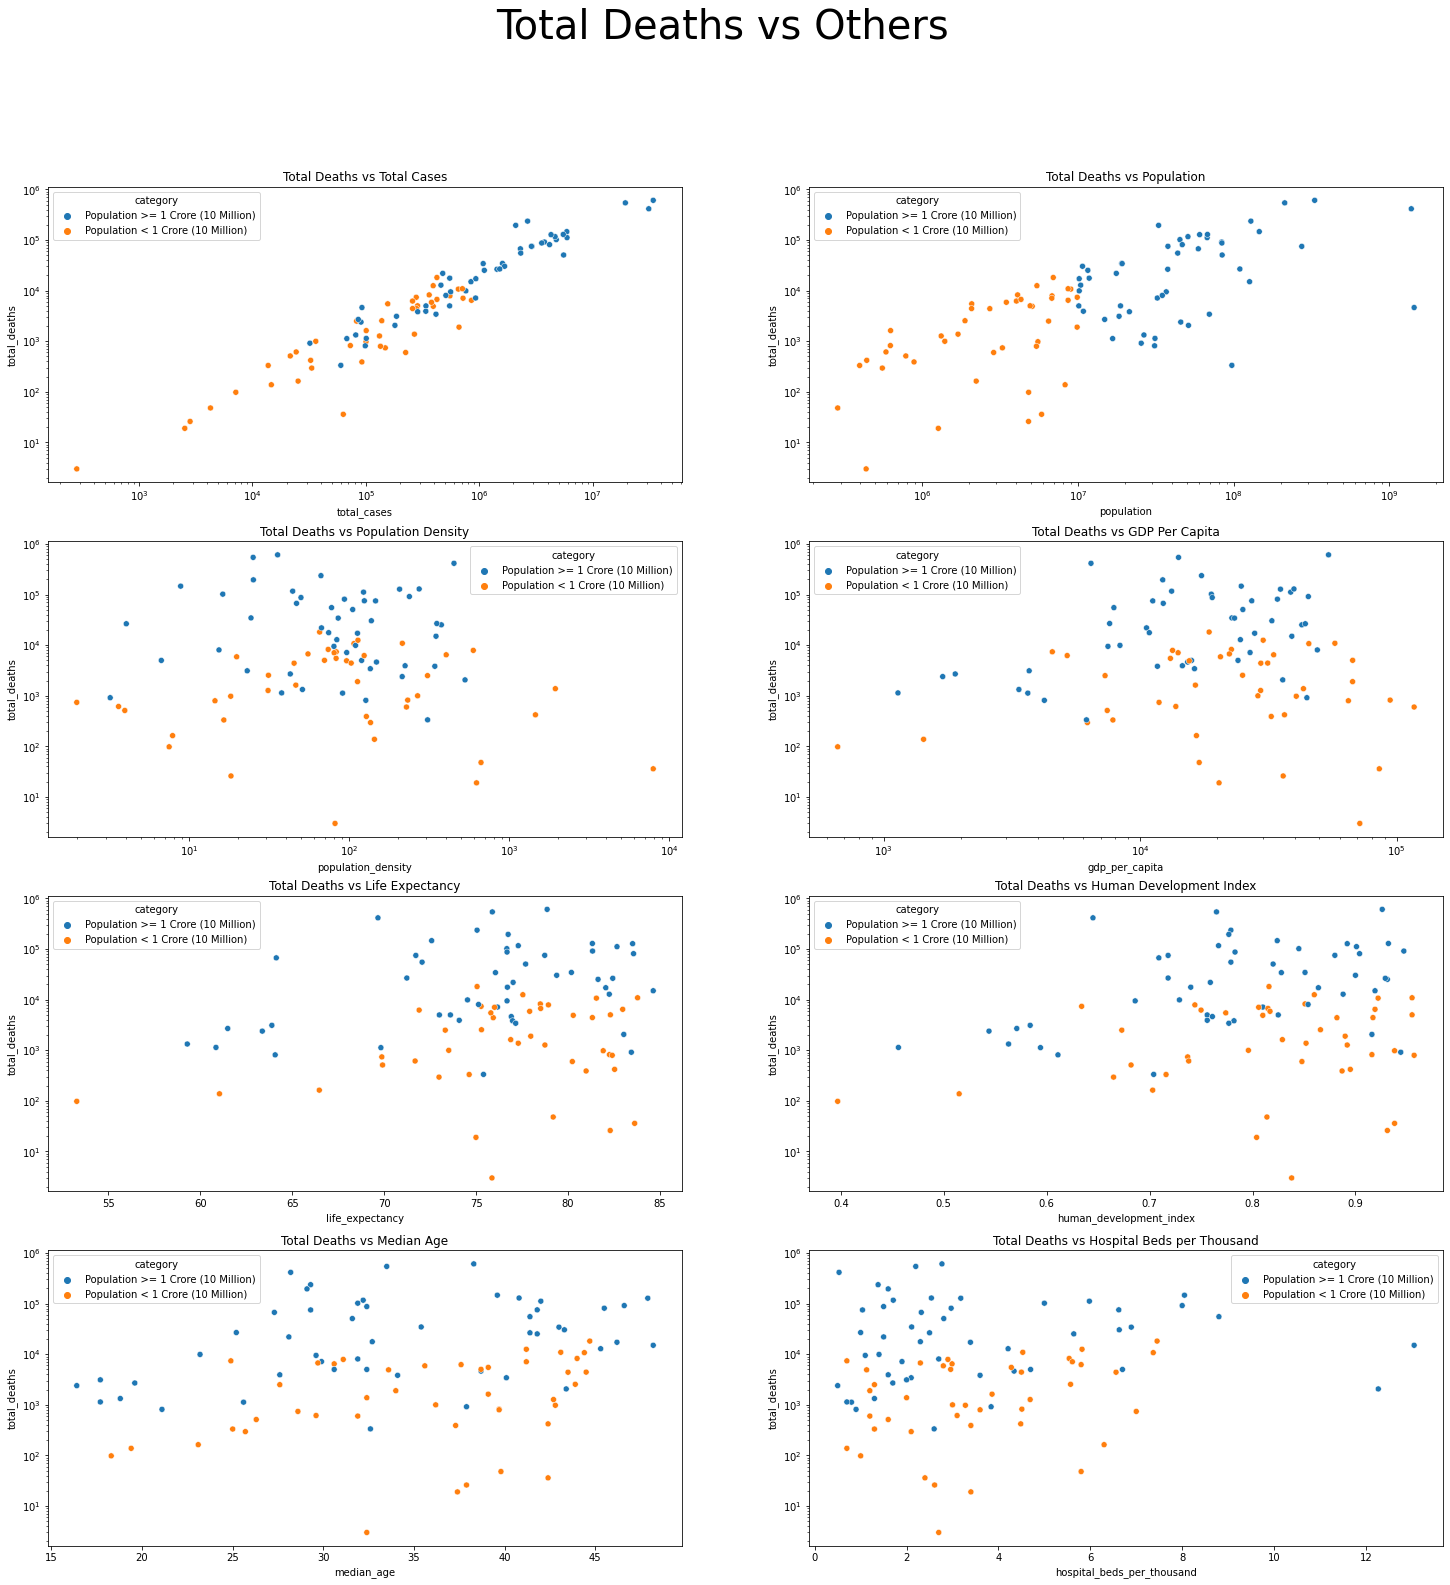

In [ ]:
#Total Deaths vs Others
fig, axes = plt.subplots(4, 2, figsize=(25, 25))
plt.suptitle('Total Deaths vs Others',fontsize=40)

#Total Deaths vs Total Cases
axes[0,0].set_title('Total Deaths vs Total Cases')
axes[0,0].set_xscale("log")
axes[0,0].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['total_cases'], y = country_covid_cases_data['total_deaths'],hue=country_covid_cases_data['category'],ax=axes[0,0]);

#Total Deaths vs Population
axes[0,1].set_title('Total Deaths vs Population')
axes[0,1].set_xscale("log")
axes[0,1].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['population'], y = country_covid_cases_data['total_deaths'],hue=country_covid_cases_data['category'],ax=axes[0,1]);

sns.scatterplot()

#Total Deaths vs Population Density
axes[1,0].set_title('Total Deaths vs Population Density')
axes[1,0].set_xscale("log")
axes[1,0].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['population_density'], y = country_covid_cases_data['total_deaths'],hue=country_covid_cases_data['category'],ax=axes[1,0]);

#Total Deaths vs GDP Per Capita
axes[1,1].set_title('Total Deaths vs GDP Per Capita')
axes[1,1].set_xscale("log")
axes[1,1].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['gdp_per_capita'], y = country_covid_cases_data['total_deaths'],hue=country_covid_cases_data['category'],ax=axes[1,1]);

#Total Deaths vs Life Expectancy
axes[2,0].set_title('Total Deaths vs Life Expectancy')
axes[2,0].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['life_expectancy'], y = country_covid_cases_data['total_deaths'],hue=country_covid_cases_data['category'],ax=axes[2,0]);

#Total Deaths vs Human Development Index
axes[2,1].set_title('Total Deaths vs Human Development Index')
axes[2,1].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['human_development_index'], y = country_covid_cases_data['total_deaths'],hue=country_covid_cases_data['category'],ax=axes[2,1]);

#Total Deaths vs Median Age
axes[3,0].set_title('Total Deaths vs Median Age')
axes[3,0].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['median_age'], y = country_covid_cases_data['total_deaths'],hue=country_covid_cases_data['category'],ax=axes[3,0]);

#Total Deaths vs Hospital Beds per Thousand
axes[3,1].set_title('Total Deaths vs Hospital Beds per Thousand')
axes[3,1].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['hospital_beds_per_thousand'], y = country_covid_cases_data['total_deaths'],hue=country_covid_cases_data['category'],ax=axes[3,1]);

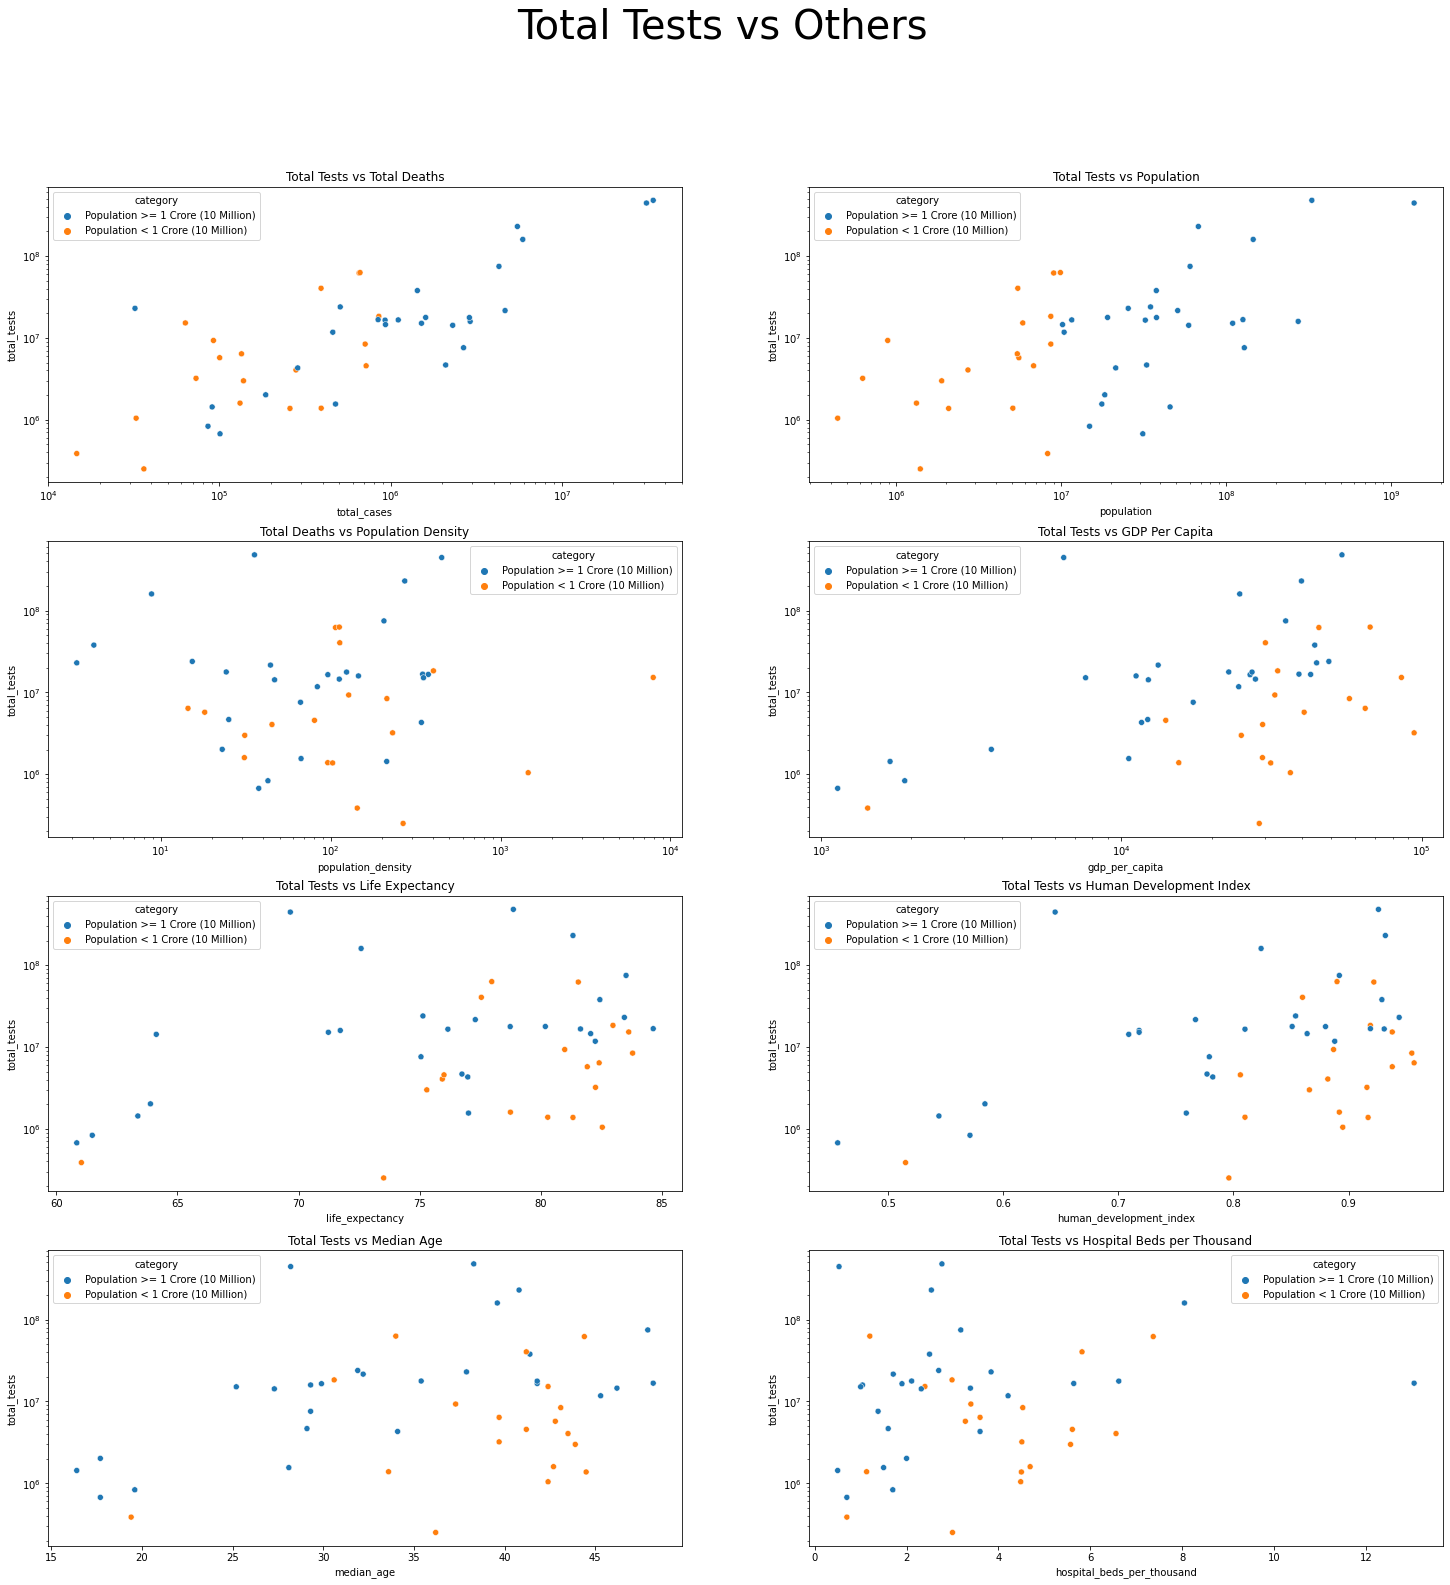

In [ ]:
 # Total Tests vs Others
fig, axes = plt.subplots(4, 2, figsize=(25, 25))
plt.suptitle('Total Tests vs Others',fontsize=40)

# plt.subplots_adjust()
# plt.subplots_adjust(bottom=0.3, 
#                     top=0.9, 
#                     hspace=0.4)

#Total Tests vs Total Deaths
axes[0,0].set_title('Total Tests vs Total Deaths')
axes[0,0].set_xscale("log")
axes[0,0].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['total_cases'], y = country_covid_cases_data['total_tests'],hue=country_covid_cases_data['category'],ax=axes[0,0]);

#Total Tests vs Population
axes[0,1].set_title('Total Tests vs Population')
axes[0,1].set_xscale("log")
axes[0,1].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['population'], y = country_covid_cases_data['total_tests'],hue=country_covid_cases_data['category'],ax=axes[0,1]);

sns.scatterplot()

#Total Tests vs Population Density
axes[1,0].set_title('Total Deaths vs Population Density')
axes[1,0].set_xscale("log")
axes[1,0].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['population_density'], y = country_covid_cases_data['total_tests'],hue=country_covid_cases_data['category'],ax=axes[1,0]);

#Total Tests vs GDP Per Capita
axes[1,1].set_title('Total Tests vs GDP Per Capita')
axes[1,1].set_xscale("log")
axes[1,1].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['gdp_per_capita'], y = country_covid_cases_data['total_tests'],hue=country_covid_cases_data['category'],ax=axes[1,1]);

#Total Tests vs Life Expectancy
axes[2,0].set_title('Total Tests vs Life Expectancy')
axes[2,0].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['life_expectancy'], y = country_covid_cases_data['total_tests'],hue=country_covid_cases_data['category'],ax=axes[2,0]);

#Total Tests vs Human Development Index
axes[2,1].set_title('Total Tests vs Human Development Index')
axes[2,1].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['human_development_index'], y = country_covid_cases_data['total_tests'],hue=country_covid_cases_data['category'],ax=axes[2,1]);

#Total Tests vs Median Age
axes[3,0].set_title('Total Tests vs Median Age')
axes[3,0].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['median_age'], y = country_covid_cases_data['total_tests'],hue=country_covid_cases_data['category'],ax=axes[3,0]);

#Total Tests vs Hospital Beds per Thousand
axes[3,1].set_title('Total Tests vs Hospital Beds per Thousand')
axes[3,1].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['hospital_beds_per_thousand'], y = country_covid_cases_data['total_tests'],hue=country_covid_cases_data['category'],ax=axes[3,1]);

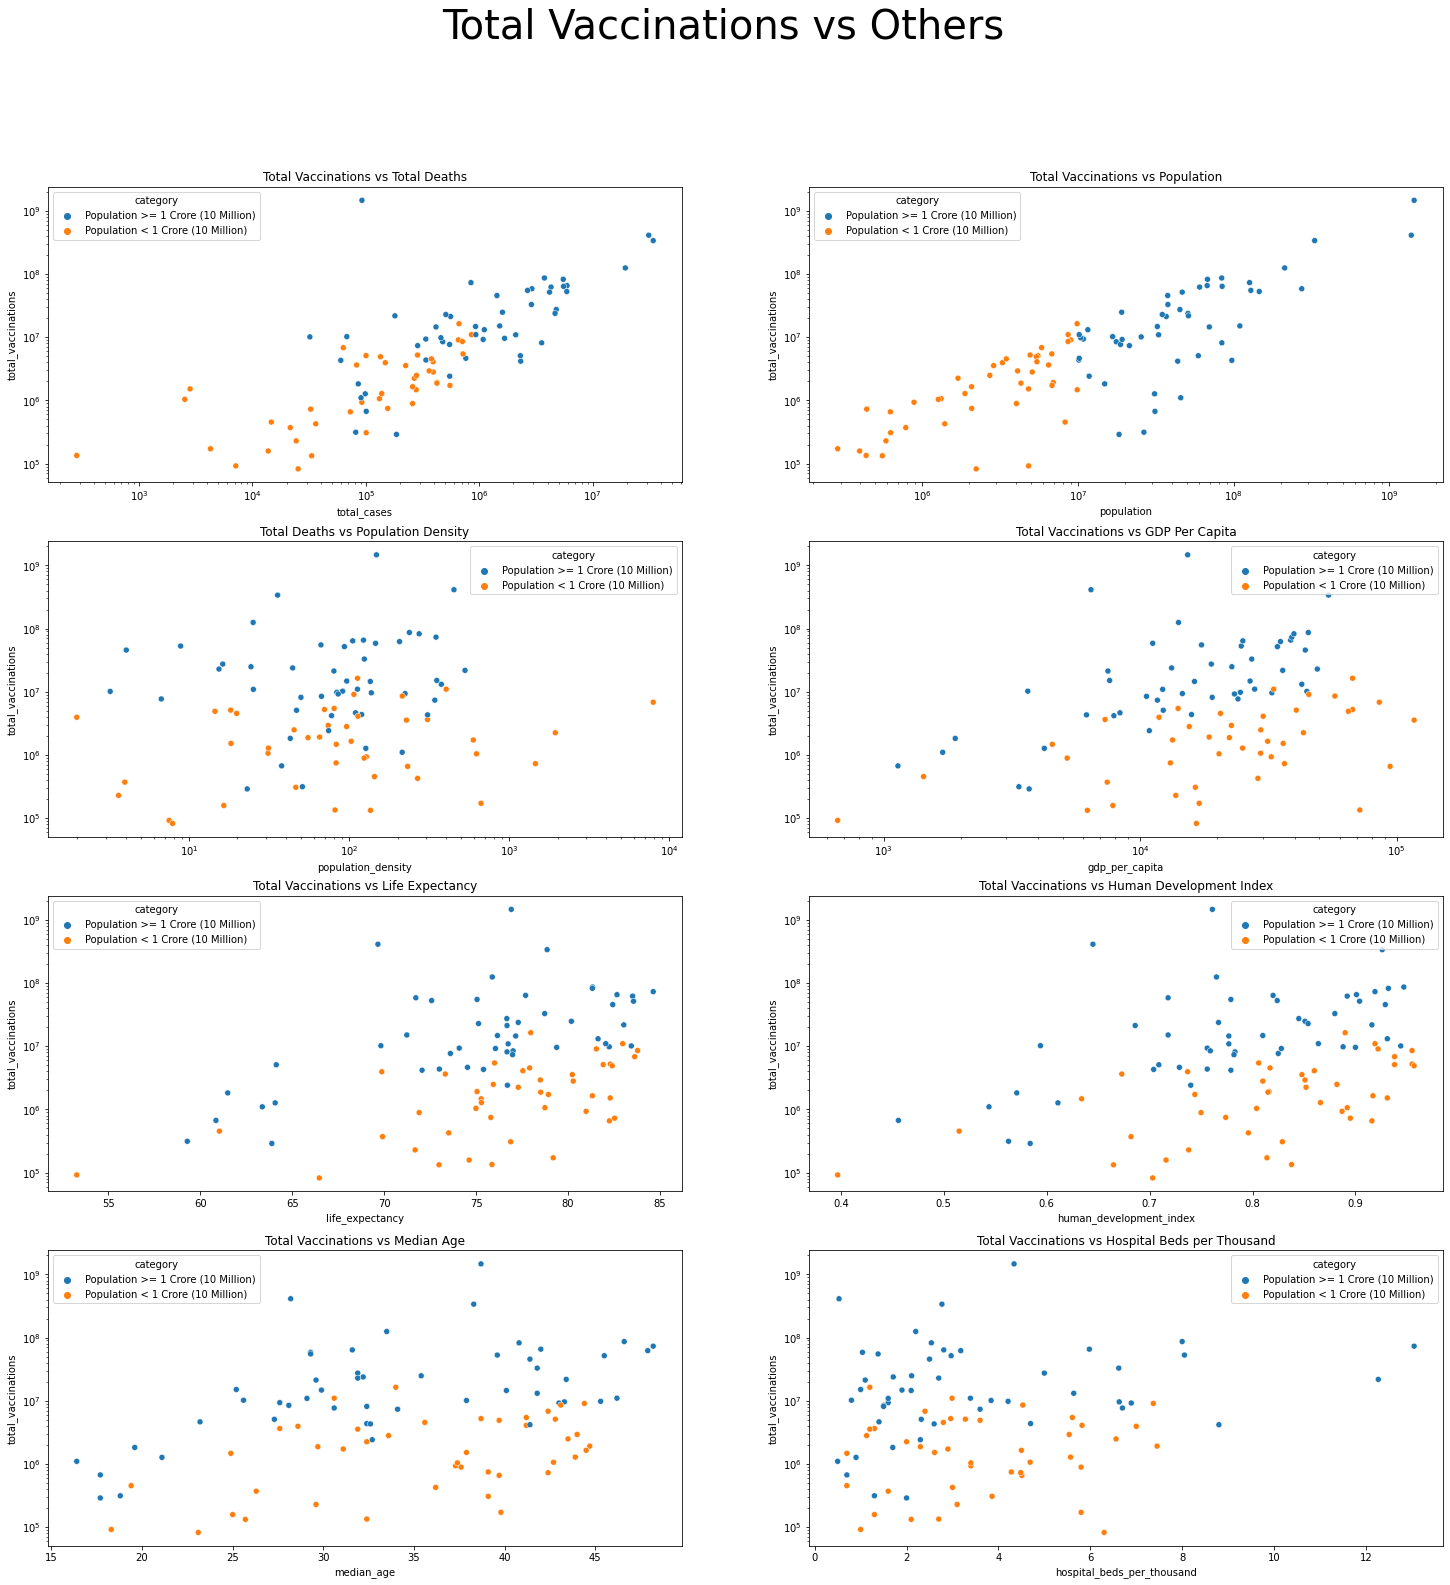

In [ ]:
 # Total Vaccinations vs Others
fig, axes = plt.subplots(4, 2, figsize=(25, 25))
plt.suptitle('Total Vaccinations vs Others',fontsize=40)

# plt.subplots_adjust()
# plt.subplots_adjust(bottom=0.3, 
#                     top=0.9, 
#                     hspace=0.4)

#Total Vaccinations vs Total Deaths
axes[0,0].set_title('Total Vaccinations vs Total Deaths')
axes[0,0].set_xscale("log")
axes[0,0].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['total_cases'], y = country_covid_cases_data['total_vaccinations'],hue=country_covid_cases_data['category'],ax=axes[0,0]);

#Total Vaccinations vs Population
axes[0,1].set_title('Total Vaccinations vs Population')
axes[0,1].set_xscale("log")
axes[0,1].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['population'], y = country_covid_cases_data['total_vaccinations'],hue=country_covid_cases_data['category'],ax=axes[0,1]);

sns.scatterplot()

#Total Vaccinations vs Population Density
axes[1,0].set_title('Total Deaths vs Population Density')
axes[1,0].set_xscale("log")
axes[1,0].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['population_density'], y = country_covid_cases_data['total_vaccinations'],hue=country_covid_cases_data['category'],ax=axes[1,0]);

#Total Vaccinations vs GDP Per Capita
axes[1,1].set_title('Total Vaccinations vs GDP Per Capita')
axes[1,1].set_xscale("log")
axes[1,1].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['gdp_per_capita'], y = country_covid_cases_data['total_vaccinations'],hue=country_covid_cases_data['category'],ax=axes[1,1]);

#Total Vaccinations vs Life Expectancy
axes[2,0].set_title('Total Vaccinations vs Life Expectancy')
axes[2,0].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['life_expectancy'], y = country_covid_cases_data['total_vaccinations'],hue=country_covid_cases_data['category'],ax=axes[2,0]);

#Total Vaccinations vs Human Development Index
axes[2,1].set_title('Total Vaccinations vs Human Development Index')
axes[2,1].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['human_development_index'], y = country_covid_cases_data['total_vaccinations'],hue=country_covid_cases_data['category'],ax=axes[2,1]);

#Total Vaccinations vs Median Age
axes[3,0].set_title('Total Vaccinations vs Median Age')
axes[3,0].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['median_age'], y = country_covid_cases_data['total_vaccinations'],hue=country_covid_cases_data['category'],ax=axes[3,0]);

#Total Vaccinations vs Hospital Beds per Thousand
axes[3,1].set_title('Total Vaccinations vs Hospital Beds per Thousand')
axes[3,1].set_yscale("log")
sns.scatterplot(x = country_covid_cases_data['hospital_beds_per_thousand'], y = country_covid_cases_data['total_vaccinations'],hue=country_covid_cases_data['category'],ax=axes[3,1]);